<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Импорт-исходных-данных" data-toc-modified-id="Импорт-исходных-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Импорт исходных данных</a></span></li><li><span><a href="#Изучение-исходных-данных" data-toc-modified-id="Изучение-исходных-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение исходных данных</a></span></li><li><span><a href="#Проверка-расчёта-эффективности-обогащения." data-toc-modified-id="Проверка-расчёта-эффективности-обогащения.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка расчёта эффективности обогащения.</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке." data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-на-различных-этапах" data-toc-modified-id="Анализ-концентрации-металлов-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов на различных этапах</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравнение-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-металлов-на-разных-стадиях." data-toc-modified-id="Исследование-суммарной-концентрации-металлов-на-разных-стадиях.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации металлов на разных стадиях.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Создание-функции-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание функции для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-различных-моделей-и-оценка-их-качества-кросс-валидацией." data-toc-modified-id="Обучение-различных-моделей-и-оценка-их-качества-кросс-валидацией.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение различных моделей и оценка их качества кросс-валидацией.</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Необходимо создать прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Предоставлены данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Основные задачи:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd #импорт библиотеки pandas
import numpy as np #импорт библиотеки numpy
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
import seaborn as sns

from sklearn.metrics import mean_absolute_error #импорт метрики MAE
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split #импорт инструмента для разделения данных

from tqdm import tqdm #импорт библиотеки для отображения процесса выполнения кода

import os

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

### Импорт исходных данных

In [3]:
    #путь для ревьюера
pth1_1 = '/datasets/gold_industry_train.csv'
pth2_1 = '/datasets/gold_industry_test.csv'
pth3_1='/datasets/gold_industry_full.csv'

    #путь для работы
pth1_2 = 'gold_industry_train.csv'
pth2_2 = 'gold_industry_test.csv'
pth3_2='gold_industry_full.csv'


if os.path.exists(pth1_1):
    df_train = pd.read_csv(pth1_1,parse_dates=['date'])
    df_test=pd.read_csv(pth2_1,parse_dates=['date'])
    df_full = pd.read_csv(pth3_1,parse_dates=['date'])
elif os.path.exists(pth1_2):
    df_train = pd.read_csv(pth1_2,parse_dates=['date'])
    df_test=pd.read_csv(pth2_2,parse_dates=['date'])
    df_full = pd.read_csv(pth3_2,parse_dates=['date'])
else:
    print('Something is wrong')

### Изучение исходных данных

Описание данных

Технологический процесс

    Rougher feed — исходное сырье
    Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    Xanthate — ксантогенат (промотер, или активатор флотации);
    Sulphate — сульфат (на данном производстве сульфид натрия);
    Depressant — депрессант (силикат натрия).
    Rougher process (англ. «грубый процесс») — флотация
    Rougher tails — отвальные хвосты
    Float banks — флотационная установка
    Cleaner process — очистка
    Rougher Au — черновой концентрат золота
    Final Au — финальный концентрат золота
        
Параметры этапов

    air amount — объём воздуха
    fluid levels — уровень жидкости
    feed size — размер гранул сырья
    feed rate — скорость подачи            

Наименование признаков

Наименование признаков должно быть такое:

    [этап].[тип_параметра].[название_параметра]
    Пример: rougher.input.feed_ag
    Возможные значения для блока [этап]:
    rougher — флотация
    primary_cleaner — первичная очистка
    secondary_cleaner — вторичная очистка
    final — финальные характеристики
    Возможные значения для блока [тип_параметра]:
    input — параметры сырья
    output — параметры продукта
    state — параметры, характеризующие текущее состояние этапа
    calculation — расчётные характеристики

Начнём с датасета train: выведем информацию методами info(), describe(). Также посмотрим на наличие пропусков, построим гистограмму распределения значений по столбцам и выведем первые несколько строк на экран.

In [4]:
#вызов информации о датасете методом info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                               14579 non-null  float64       
 2   rougher.input.feed_ag                               14579 non-null  float64       
 3   rougher.input.feed_pb                               14507 non-null  float64       
 4   rougher.input.feed_sol                              14502 non-null  float64       
 5   rougher.input.feed_rate                             14572 non-null  float64       
 6   rougher.input.feed_size                             14478 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64       
 8   roughe

In [5]:
#вызов информации о датасете методом describe()
df_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14150.000000,14579.000000,14579.000000,14579.000000,14543.000000,14172.000000,1.457800e+04,14578.000000,14578.000000,14579.000000,14579.000000,14579.000000,14579.000000,14561.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14556.000000,14551.000000,14579.000000,14518.000000,1.457600e+04,14579.000000,1.457600e+04,14579.000000,1.457900e+04,14579.000000,1.457800e+04,14579.000000,14579.000000,14579.000000,14491.000000,14314.000000,14579.000000,14575.000000,14573.000000,14534.000000,14485.000000,14579.000000,14557.000000,14579.000000,14567.000000,14579.000000,14579.000000,14579.000000,14574.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14578.000000,14579.000000,14579.000000,14578.000000,14575.000000,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579

Как видно, в столбцах присутствуют совершенно разные порядки величин, от долей единиц до е+6. Также, возможно, присутствуют выбросы: например, минимальное значение primary_cleaner.state.floatbank8_a_air 5.445860e-32 при среднем значении 1.589676e+03: стоит иметь это в виду при выполнении предобработки.	

Отметим, что формат даты (столбец date) имеет тип object. При предобработке нужно будет перевести его в datetime. 

Также в столбцах присутствуют пропуски. Проверим их количество по столбцам:

In [6]:
#вывод информации о столбцах с пропусками
#раскрасим градиент значений процента пропусков
pd.DataFrame((df_train.isna().mean()*100)[(df_train.isna().mean()*100).values>0])\
.style.background_gradient('coolwarm')

,0
rougher.input.feed_pb,0.493861
rougher.input.feed_sol,0.528157
rougher.input.feed_rate,0.048014
rougher.input.feed_size,0.692777
rougher.input.floatbank10_sulfate,0.212635
rougher.input.floatbank10_xanthate,0.048014
rougher.state.floatbank10_e_air,2.942589
rougher.input.floatbank11_sulfate,0.246931
rougher.input.floatbank11_xanthate,2.791687
rougher.calculation.sulfate_to_au_concentrate,0.006859


Для большинства столбцов число пропусков составляет менее 1%, однако максимальное значение - для столбца secondary_cleaner.output.tail_sol - 6,3%. Запомним этот момент на будущее, когда в пункте 1.4 будем выполнять предобработку данных.

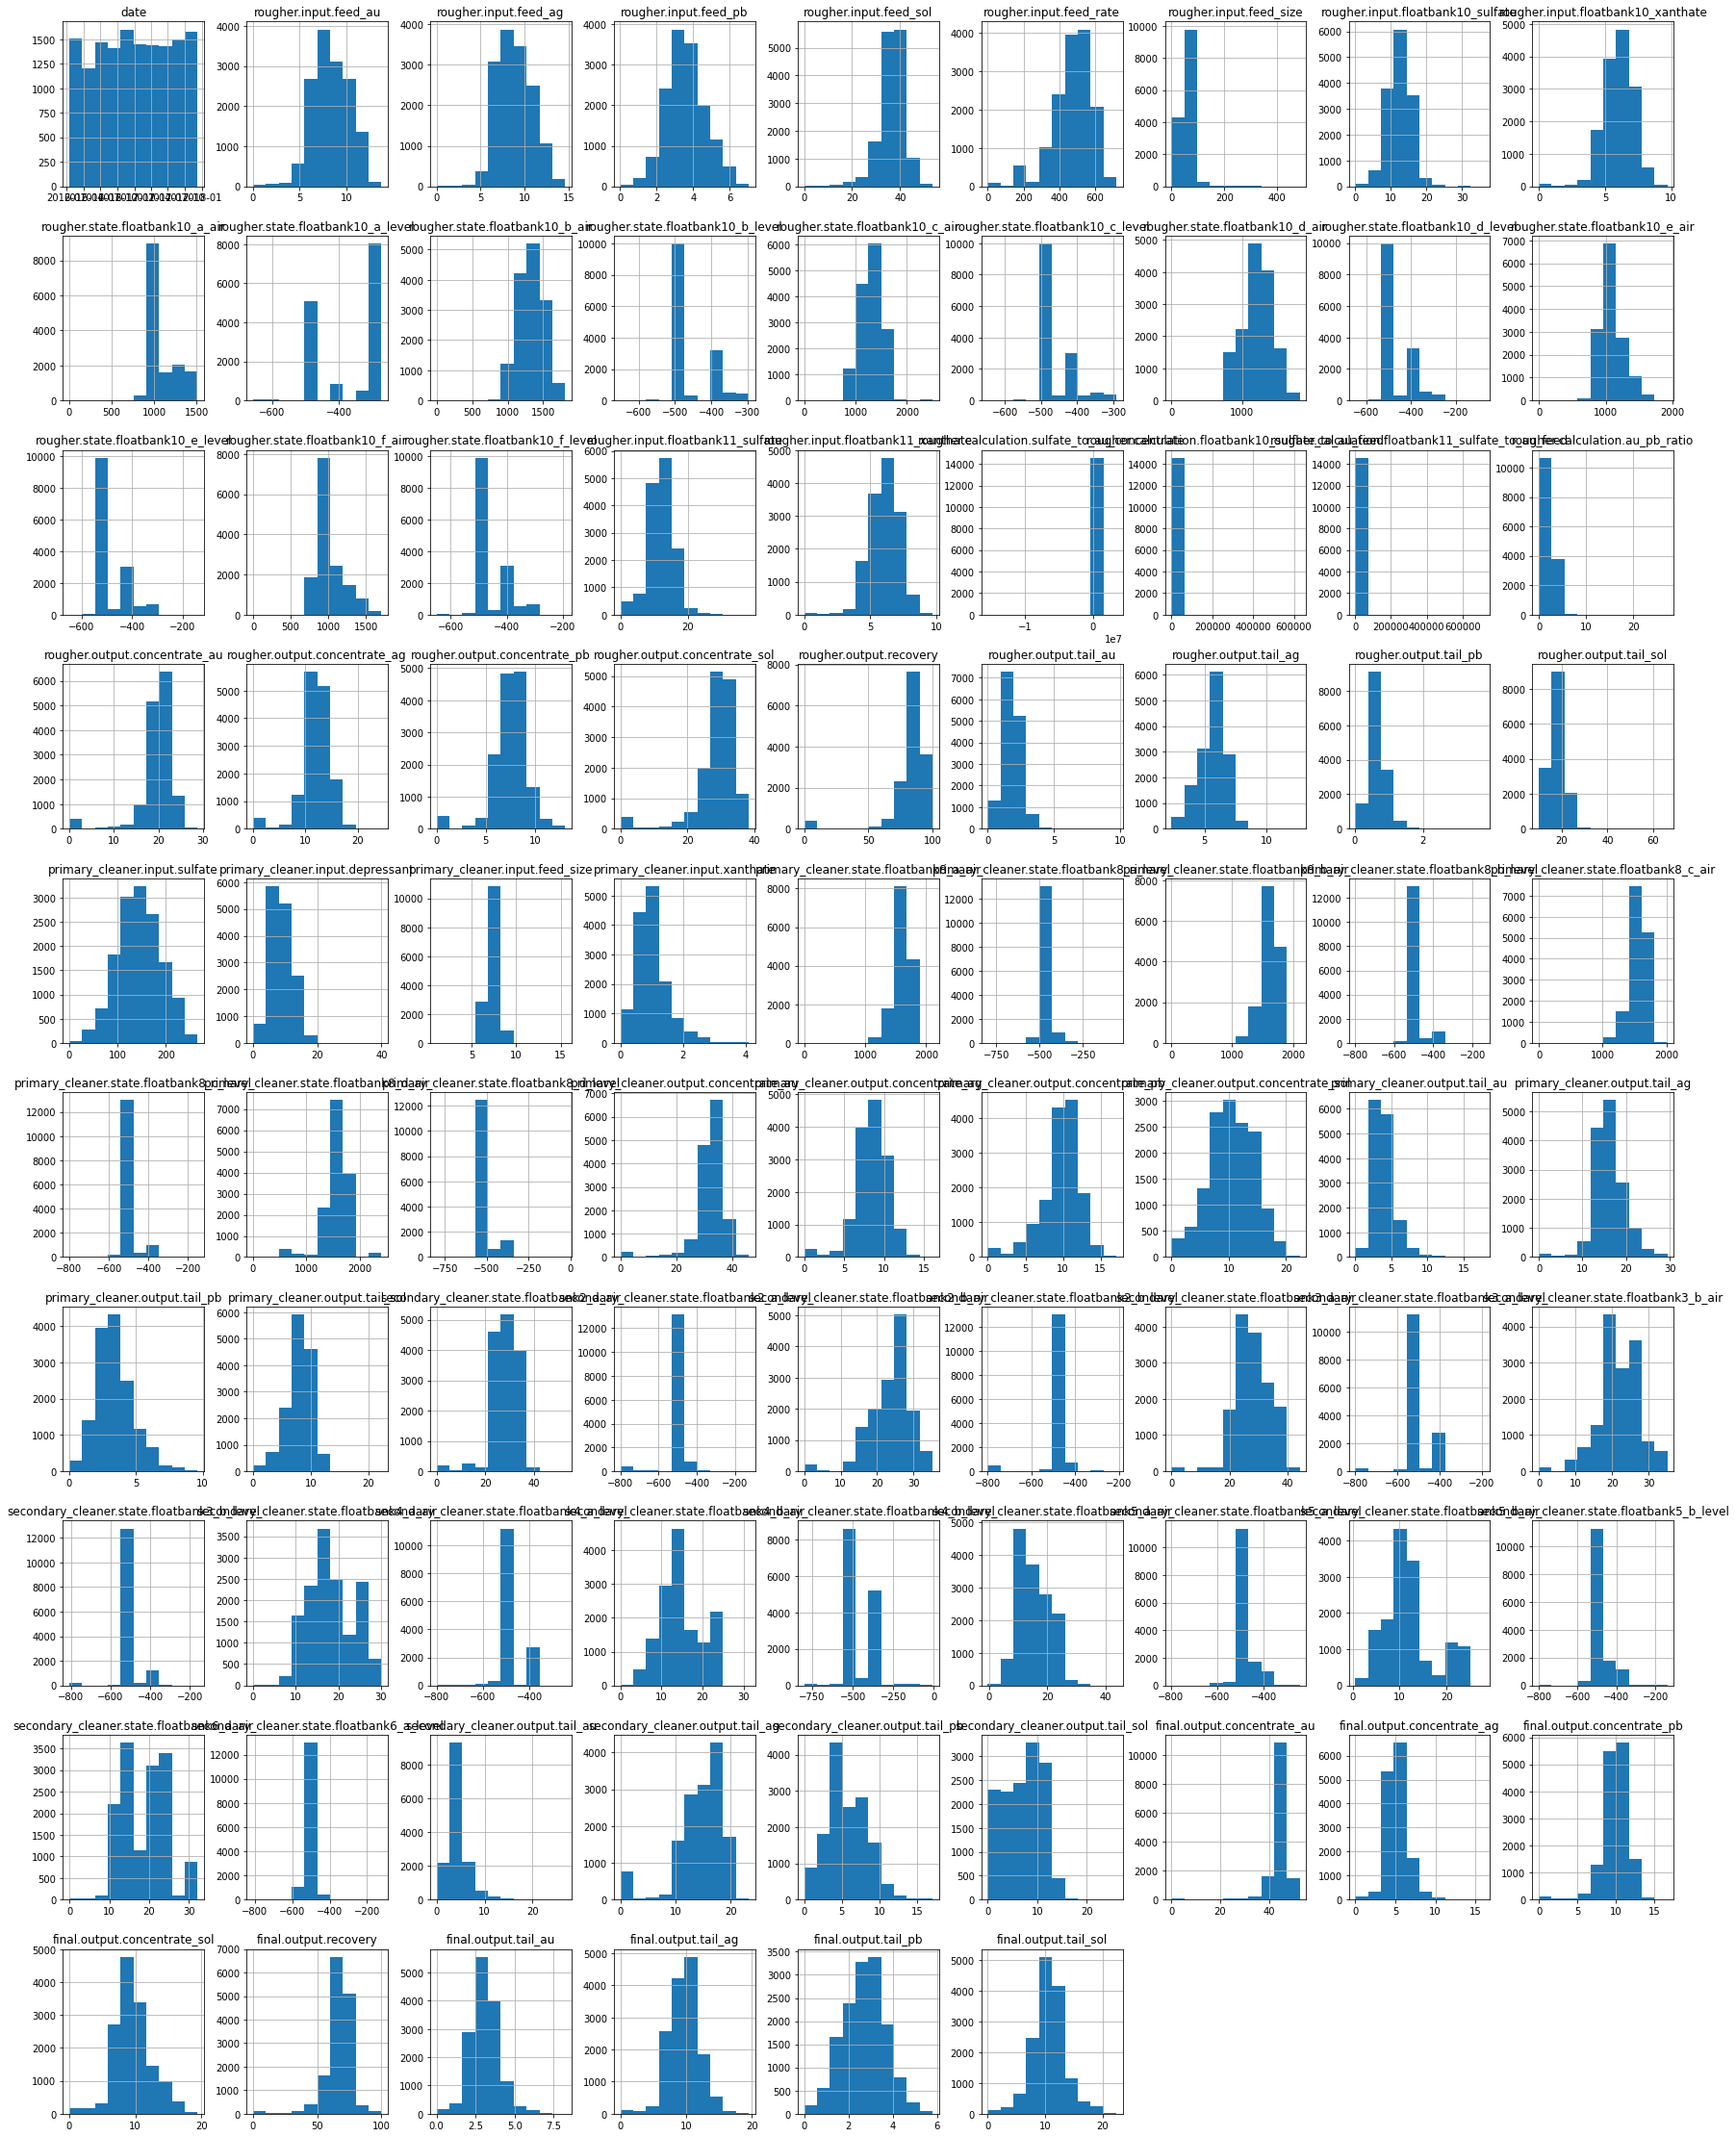

In [7]:
#вывод гистограмм распеделения по числовым столбцам
df_train.hist(figsize=(30,40));

In [8]:
#вывод первых нескольких строк таблицы
df_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

Продолжим для датасета test: выведем информацию методами info(), describe(). Также посмотрим на наличие пропусков, построим гистограмму распределения значений по столбцам и выведем первые несколько строк на экран.

In [9]:
#вызов информации о датасете методом info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        4860 non-null   datetime64[ns]
 1   rougher.input.feed_au                       4860 non-null   float64       
 2   rougher.input.feed_ag                       4860 non-null   float64       
 3   rougher.input.feed_pb                       4832 non-null   float64       
 4   rougher.input.feed_sol                      4838 non-null   float64       
 5   rougher.input.feed_rate                     4856 non-null   float64       
 6   rougher.input.feed_size                     4816 non-null   float64       
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64       
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64       
 9   rougher.

In [10]:
#вызов информации о датасете методом describe()
df_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4860.000000,4860.000000,4853.000000,4860.000000,4860.000000,4860.000000,4852.000000,4814.000000,4859.000000,4851.000000,4860.000000,4817.000000,4859.000000,4859.000000,4859.000000,4859.000000,4858.000000,4859.000000,4858.000000,4859.000000,4734.000000,4859.000000,4859.000000,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,1312.346061,-472.506533,1291.638282,-472.902514,1204.066585,-473.380689,1075.304980,-471.465792,1023.769668,-471.412834,11.969074,6.119323,143.201672,8.692446,7.305514,1.007577,1588.387039,-488.223175,1589.297134,-490.255893,1588.905465,-489.741555,1530.287801,-485.896489,29.488451,-499.504602,24.732293,-499.556727,2.889647e+01,-489.475315,2.263273e+01,-494.765779,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,159.001709,49.376824,180.203670,47.611728,184.547737,47.828848,159.989533,51.413832,147.827669,51.838763,3.456113,1.049065,42.360060,3.169592,0.588602,0.494669,124.942960,36.672631,132.102797,35.203702,132.689236,33.650676,256.268884,43.296128,5.357783,43.284386,5.484220,43.619785,6.159087e+00,51.827314,5.456797e+00,40.681493,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,767.656587,-649.997496,831.537936,-552.657032,706.281918,-648.118446,695.211786,-598.926149,539.633937,-649.376184,0.000163,0.002616,7.329299,0.000000,4.970000,0.000154,314.241165,-653.477578,319.959489,-799.260788,273.536823,-709.213816,131.321672,-799.791618,0.122013,-799

Как видно, количество значений меньше, возможно аналогично предыдущему есть выбросы, дата - object, а также в столбцах присутствуют пропуски. Проверим их количество по столбцам:

In [11]:
#вывод информации о столбцах с пропусками
#раскрасим градиент значений процента пропусков
pd.DataFrame((df_test.isna().mean()*100)[(df_test.isna().mean()*100).values>0])\
.style.background_gradient('coolwarm')

,0
rougher.input.feed_pb,0.576132
rougher.input.feed_sol,0.452675
rougher.input.feed_rate,0.082305
rougher.input.feed_size,0.905350
rougher.input.floatbank10_sulfate,0.061728
rougher.input.floatbank10_xanthate,0.020576
rougher.state.floatbank10_a_air,0.020576
rougher.state.floatbank10_a_level,0.020576
rougher.state.floatbank10_b_air,0.020576
rougher.state.floatbank10_b_level,0.020576


Для большинства столбцов число пропусков составляет менее 1%, однако максимальное значение - для столбца secondary_cleaner.state.floatbank2_a_air - 2,6%. Запомним этот момент на будущее, когда в пункте 1.4 будем выполнять предобработку данных.

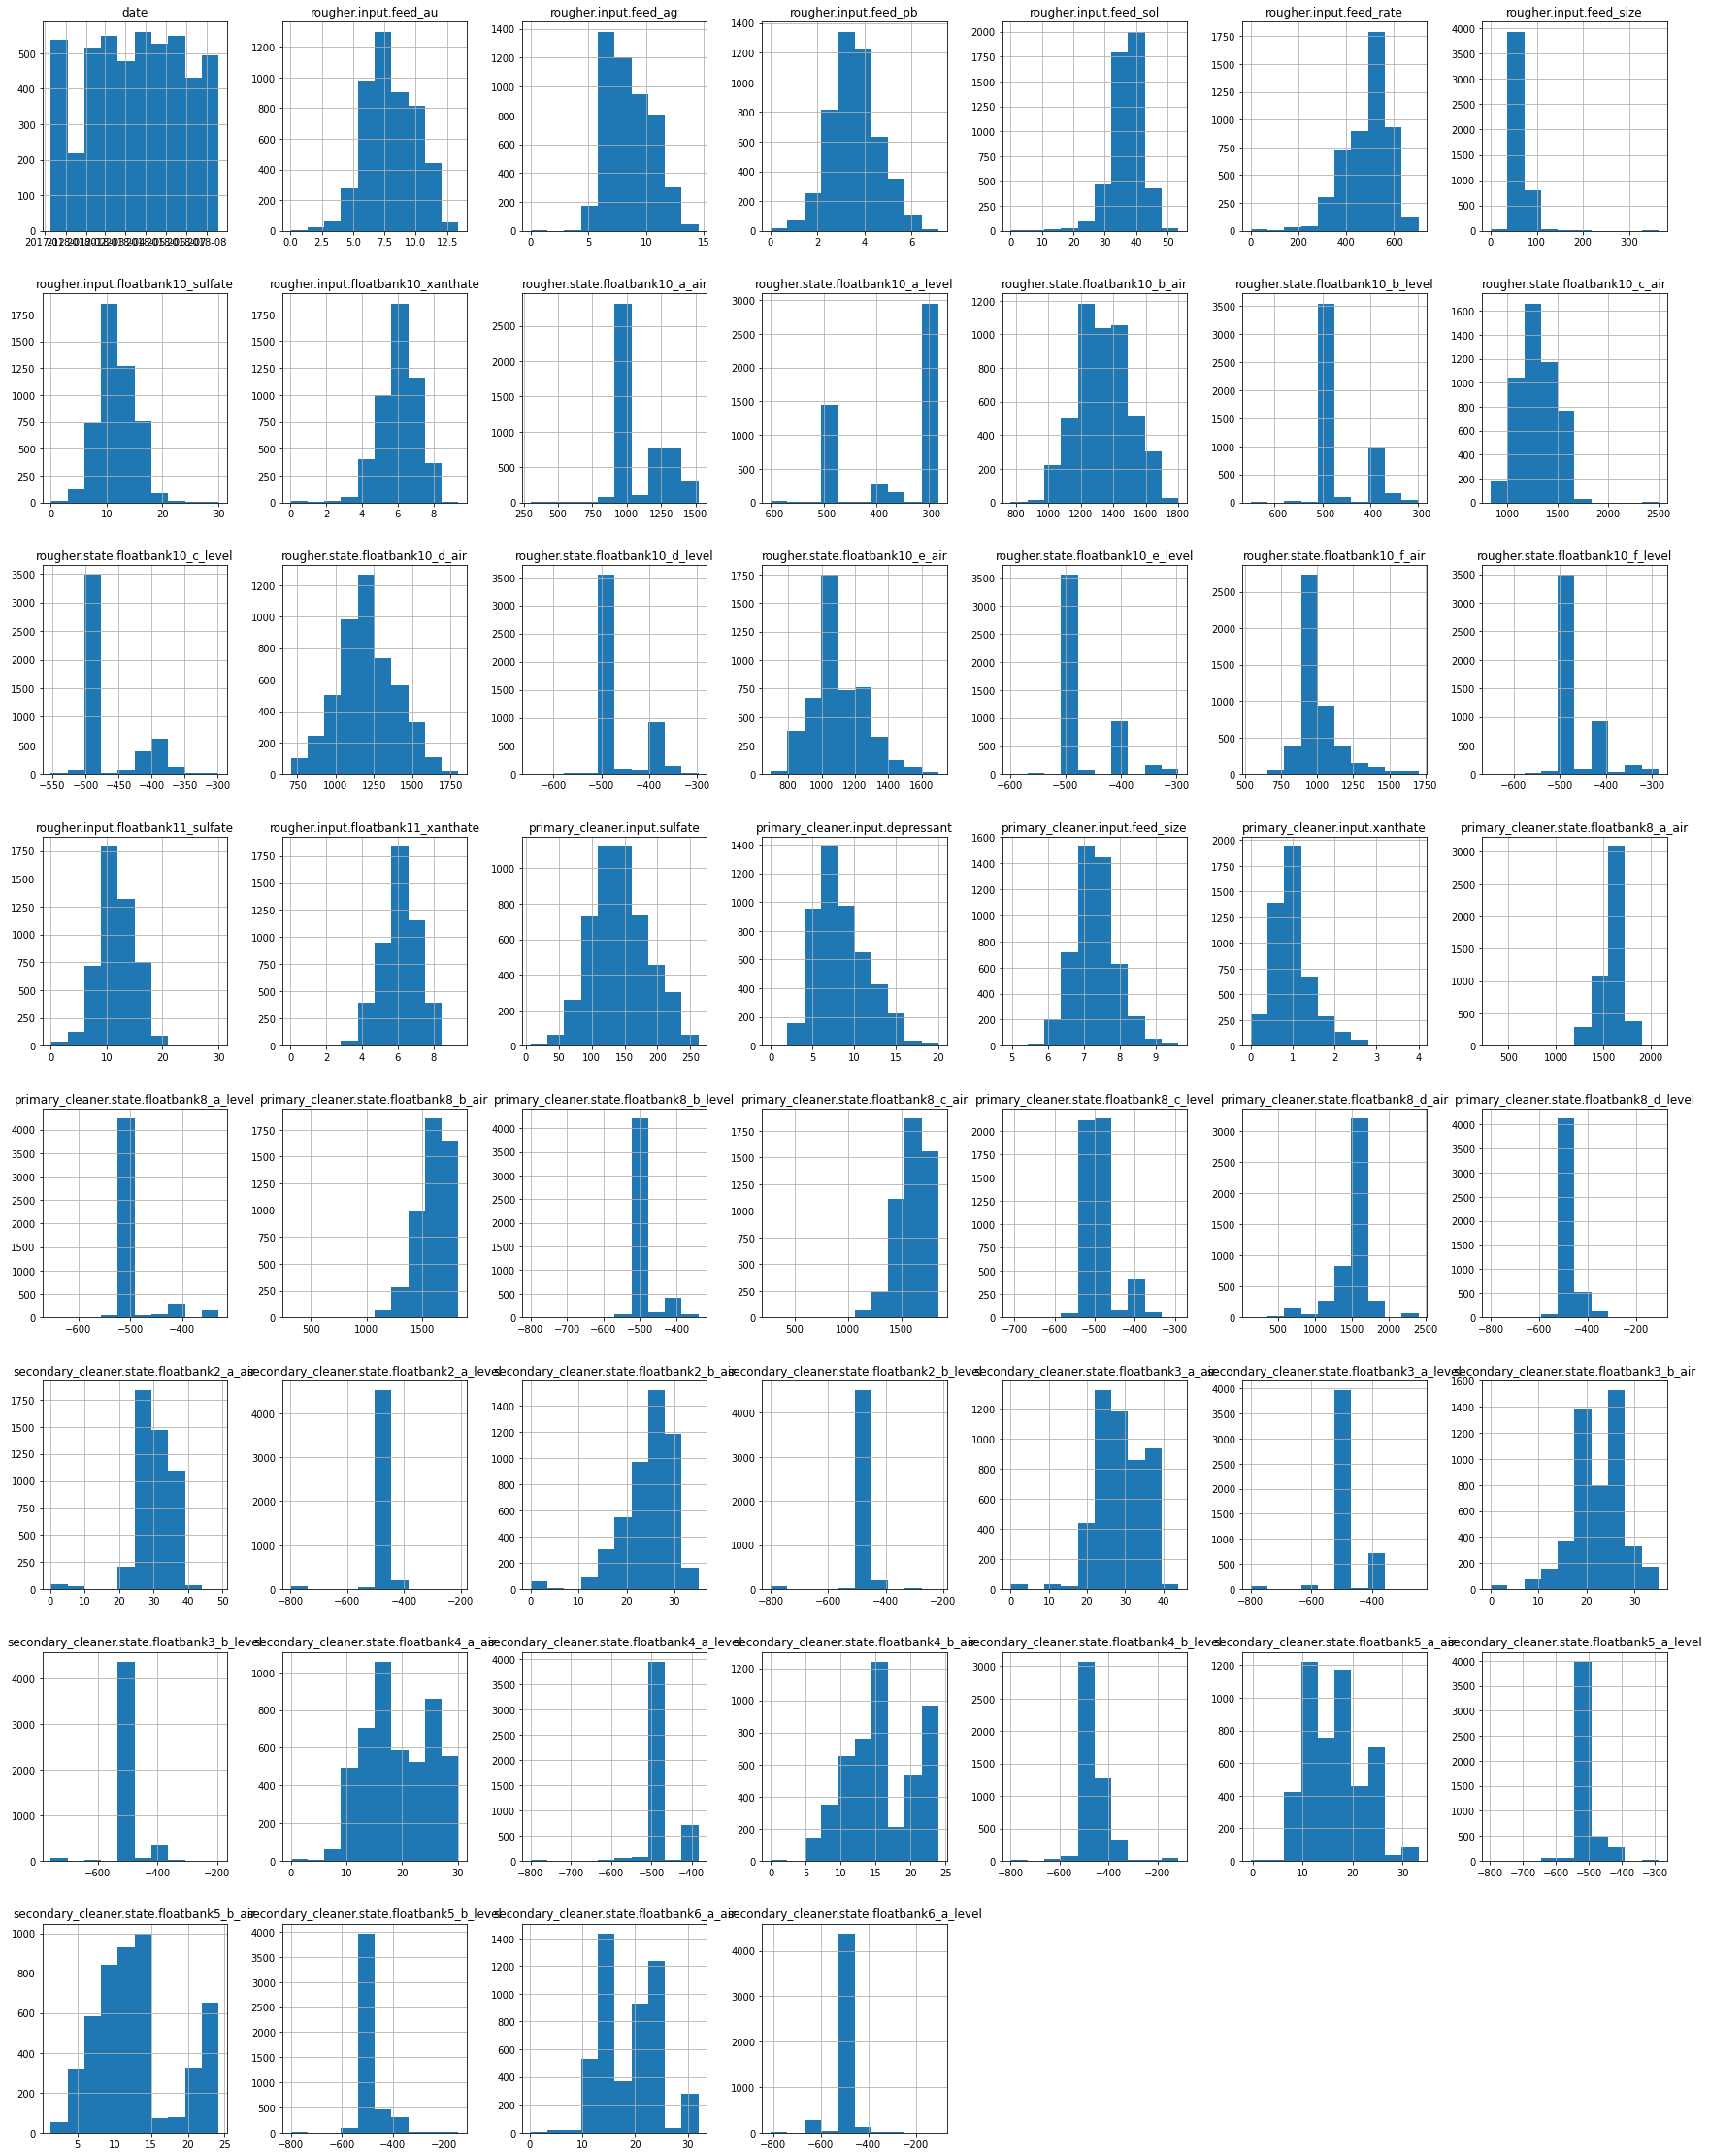

In [12]:
#вывод гистограмм распеделения по числовым столбцам
df_test.hist(figsize=(30,40));

Пока что можно сказать, что аналогично датасету train гистограммы распределния величин имеют как нормальный вид распределения, так и совершенно иные виды распределений. Отметим это для дальнейшей работы.

In [13]:
#вывод первых нескольких строк таблицы
df_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

И теперь для датасета full: выведем информацию методами info(), describe(). Также посмотрим на наличие пропусков, построим гистограмму распределения значений по столбцам и выведем первые несколько строк на экран.

In [14]:
#вызов информации о датасете методом info()
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   rougher.input.feed_au                               19439 non-null  float64       
 2   rougher.input.feed_ag                               19439 non-null  float64       
 3   rougher.input.feed_pb                               19339 non-null  float64       
 4   rougher.input.feed_sol                              19340 non-null  float64       
 5   rougher.input.feed_rate                             19428 non-null  float64       
 6   rougher.input.feed_size                             19294 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64       
 8   roughe

In [15]:
#вызов информации о датасете методом describe()
df_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19395.000000,18986.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,19439.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439

Как видно, количество значений меньше, возможно аналогично предыдущим есть выбросы, дата - object, а также в столбцах присутствуют пропуски. Проверим их количество по столбцам:

In [16]:
#вывод информации о столбцах с пропусками
#раскрасим градиент значений процента пропусков
pd.DataFrame((df_full.isna().mean()*100)[(df_full.isna().mean()*100).values>0])\
.style.background_gradient('coolwarm')

,0
rougher.input.feed_pb,0.514430
rougher.input.feed_sol,0.509285
rougher.input.feed_rate,0.056587
rougher.input.feed_size,0.745923
rougher.input.floatbank10_sulfate,0.174906
rougher.input.floatbank10_xanthate,0.041154
rougher.state.floatbank10_a_air,0.005144
rougher.state.floatbank10_a_level,0.005144
rougher.state.floatbank10_b_air,0.005144
rougher.state.floatbank10_b_level,0.005144


Для большинства столбцов число пропусков составляет менее 1%, однако максимальное значение - для столбца secondary_cleaner.output.tail_sol - 8,99%. Интересно, что это самое большое значение пропусков (в test этого столбца нет). Запомним этот момент на будущее, когда в пункте 1.4 будем выполнять предобработку данных.

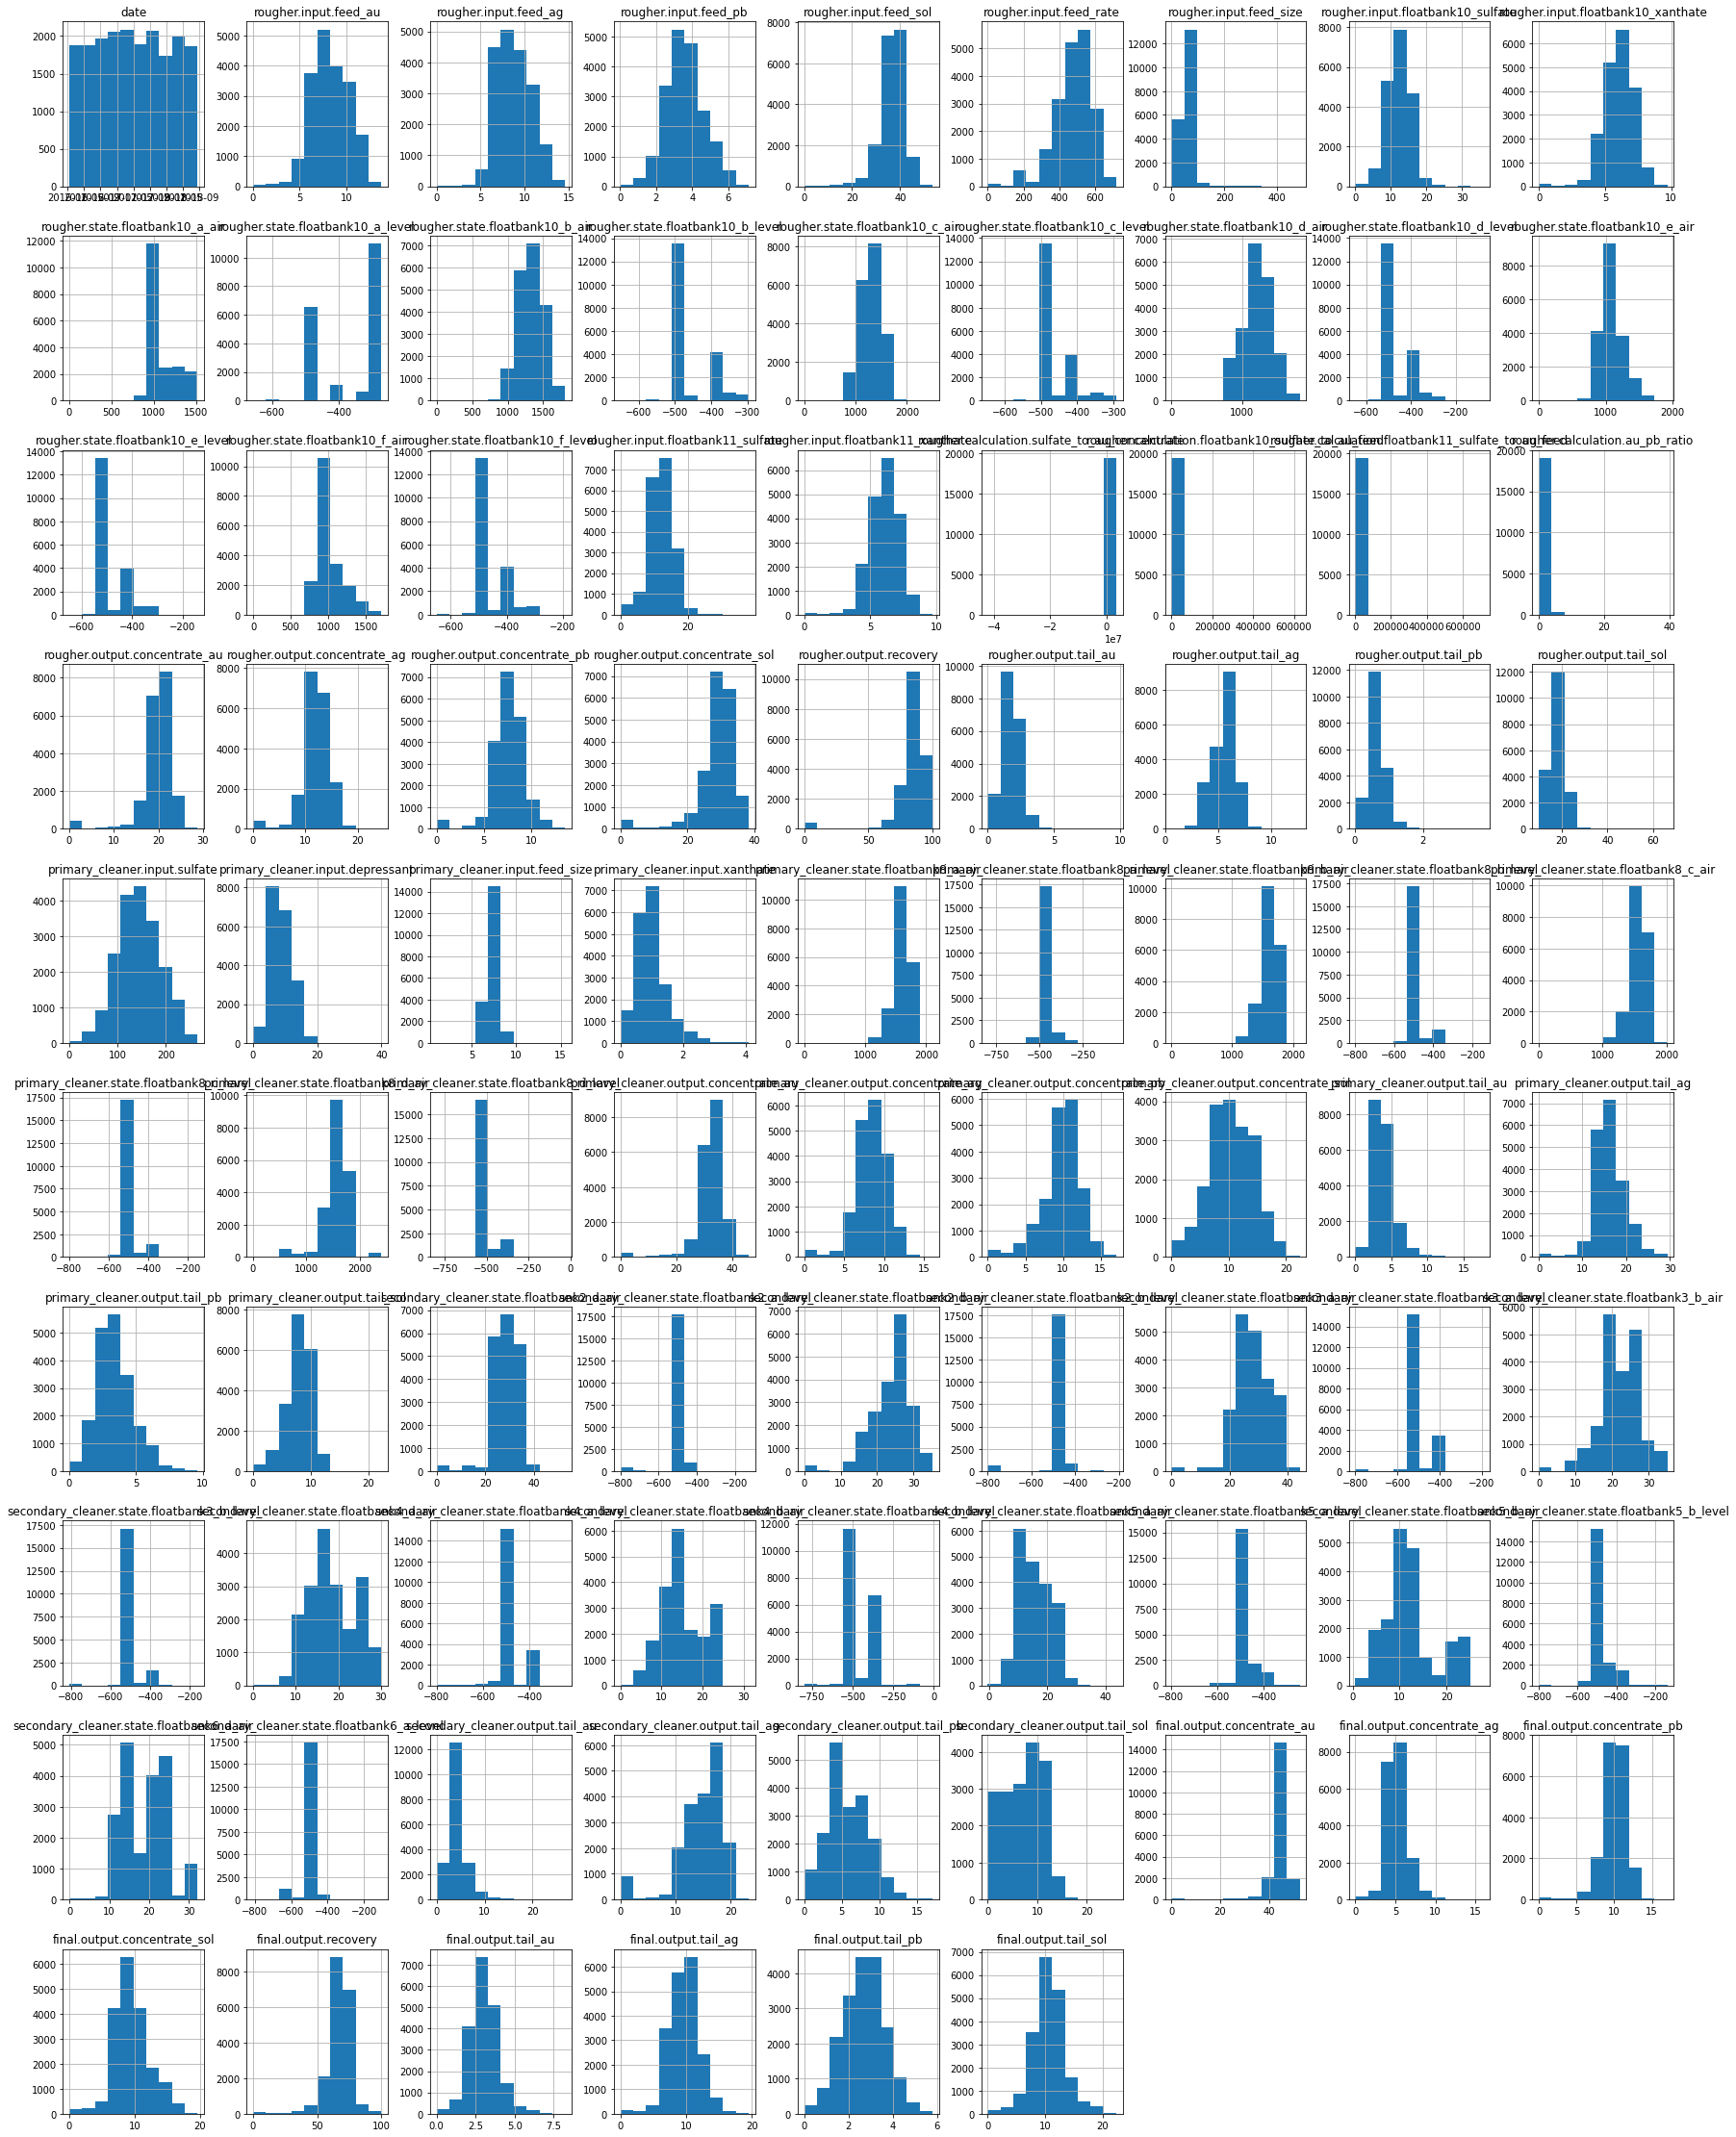

In [17]:
#вывод гистограмм распеделения по числовым столбцам
df_full.hist(figsize=(30,40));

Пока что можно сказать, что аналогично датасетам train,test гистограммы распределния величин имеют как нормальный вид распределения, так и совершенно иные виды распределений. Отметим это для дальнейшей работы.

In [18]:
#вывод первых нескольких строк таблицы
df_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

### Проверка расчёта эффективности обогащения.

Для проверки расчёта эффективности обогащения вычислим её на обучающей выборке для признака rougher.output.recovery, а далее найдём MAE между расчётами и значением признака.

Создадим функцию для расчёта эффективности обогащения.

Эффективность обогащения рассчитывается по формуле:

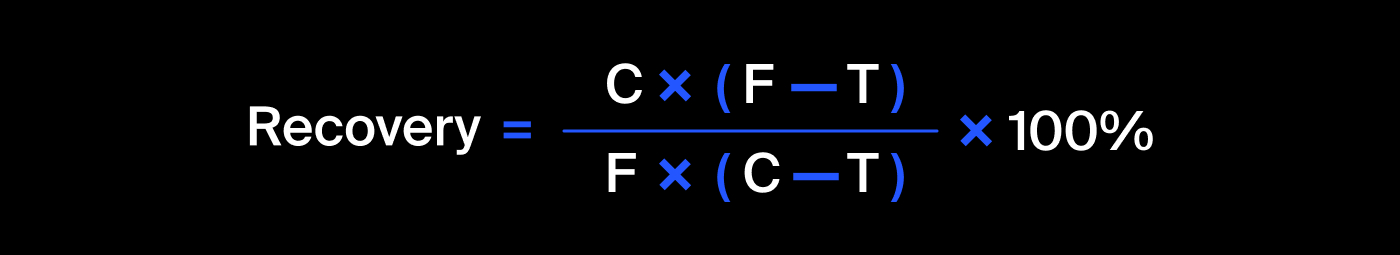

где:

    C — доля золота в концентрате после флотации/очистки;
    F — доля золота в сырье/концентрате до флотации/очистки;
    T — доля золота в отвальных хвостах после флотации/очистки.

In [19]:
#создание функции расчёта эффективности обогащения
def recovery(C,F,T):
    return (C*(F-T))*100/(F*(C-T))

In [20]:
#применение функции расчёта эффективности обогащения
rougher_output_recovery_au_mine=recovery(df_train['rougher.output.concentrate_au'],\
                                         df_train['rougher.input.feed_au'],df_train['rougher.output.tail_au'])

#вычисление средней абсолютной ошибки
mean_absolute_error(df_train['rougher.output.recovery'],rougher_output_recovery_au_mine)

1.1181885454685472e-14

In [21]:
#вывод среднего значения по столбцу rougher.output.recovery (для понимания величины ошибки)
df_train['rougher.output.recovery'].mean()

82.52119968211336

Из полученного видно, что значение средней абсолютной ошибки имеет крайне малое значение: 1.11e-14, тогда как среднее число по столбцу df_train['rougher.output.recovery'] = 82.5. **Следовательно, значения, представленные в столбце rougher.output.recovery верны.**

### Анализ признаков, недоступных в тестовой выборке.

Посмотрим на признаки, которые есть в полном датасете, и которых нет в тестовой. Посмотрим, что это за параметры, и какого они типа.

In [22]:
#вывод признаков, которые есть в полном датасете, и которых нет в тестовом
pd.DataFrame(df_full.loc[:,~df_full.columns.isin(list(df_test))].columns)

,0
0,rougher.calculation.sulfate_to_au_concentrate
1,rougher.calculation.floatbank10_sulfate_to_au_...
2,rougher.calculation.floatbank11_sulfate_to_au_...
3,rougher.calculation.au_pb_ratio
4,rougher.output.concentrate_au
5,rougher.output.concentrate_ag
6,rougher.output.concentrate_pb
7,rougher.output.concentrate_sol
8,rougher.output.recovery
9,rougher.output.tail_au


Как видно, недоступные в тестовой выборке признаки принадлежат следующим блокам:

    calculation - расчётные характеристики;
    output - параметры продукта.
    
Видимо, строки с этими данными (output )являются целевыми для предсказаний, а часть из них (calculation) - это расчётные характеристики (так и называются), а потому их предсказывать особо смысла нет: они рассчитываются по каким-то реально уже существующим формулам и связаны друг с другом (возможно). 

Тип всех этих данных - числовой, float64

### Предобработка данных

**Реформирование выборок df_train, df_test с учётом условий задачи.**

**Столбцы primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_d_air**

По условию итоговой задачи, нужно обучить модель на обучающих данных df_train, и проверить их на тестовой выборке. Следовательно данные в обеих выборках нужно привести к общему виду, а именно:

    для выборки df_train - удалить столбцы, которых нет в выборке test (за исключением целевых признаков rougher.output.recovery, final.output.recovery);
    для выборки df_test - добавить целевые признаки из полного датасета df_full.

In [23]:
#удаление признаков из выборки df_train
#сохранение списка названий столбцов, которых нет в df_test за исключением целевых
df_train_test_drop=(df_full.loc[:,~df_full.columns.isin(list(df_test))].columns).drop(
    ['rougher.output.recovery', 'final.output.recovery']).tolist()

#удаление столбцов из списка
df_train=df_train.drop(columns=df_train_test_drop,axis=1)
#вывод-проверка
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                       14579 non-null  float64       
 2   rougher.input.feed_ag                       14579 non-null  float64       
 3   rougher.input.feed_pb                       14507 non-null  float64       
 4   rougher.input.feed_sol                      14502 non-null  float64       
 5   rougher.input.feed_rate                     14572 non-null  float64       
 6   rougher.input.feed_size                     14478 non-null  float64       
 7   rougher.input.floatbank10_sulfate           14548 non-null  float64       
 8   rougher.input.floatbank10_xanthate          14572 non-null  float64       
 9   roughe

In [24]:
#добавление в df_test столбцов с целевыми признаками из df_full
df_test=df_test.merge(df_full[['date','rougher.output.recovery', 'final.output.recovery']],on='date')

#вывод-проверка
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4860 entries, 0 to 4859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        4860 non-null   datetime64[ns]
 1   rougher.input.feed_au                       4860 non-null   float64       
 2   rougher.input.feed_ag                       4860 non-null   float64       
 3   rougher.input.feed_pb                       4832 non-null   float64       
 4   rougher.input.feed_sol                      4838 non-null   float64       
 5   rougher.input.feed_rate                     4856 non-null   float64       
 6   rougher.input.feed_size                     4816 non-null   float64       
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64       
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64       
 9   rougher.

Далее обработаем пропуски. При изучении датафрейма была получена информация о том, что в некоторых столбцах есть пропуски. При этом в описании проекта была получена информация о том, что соседние по времени параметры часто похожи. Тогда есть смысл заполнить пропуски соседними значениями: возьмём предыдущие.

In [25]:
#заполнение пропусков методом fillna с параметром (method='ffull': предыдущим значением строки)
df_train=df_train.fillna(method='ffill')
df_test=df_test.fillna(method='ffill')
df_full=df_full.fillna(method='ffill')

#проверка наличия пропусков
print((df_train.isna().mean())[(df_train.isna().mean()).values>0])
print((df_test.isna().mean())[(df_test.isna().mean()).values>0])
print((df_full.isna().mean())[(df_full.isna().mean()).values>0])

Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)


Далее есть смысл обработать выбросы для двух столбцов, у которых минимальное значение на несколько порядков выбивается из распределения значений: 

    primary_cleaner.state.floatbank8_a_air, 
    primary_cleaner.state.floatbank8_b_air,
    primary_cleaner.state.floatbank8_c_air,
    primary_cleaner.state.floatbank8_d_air
    
На примере датасета full посмотрим на данные величины при помощи гистограммы, диаграммы размаха и метода describe(). А затем применим стратегию для датасетов train и test.

**Столбец primary_cleaner.state.floatbank8_a_air**

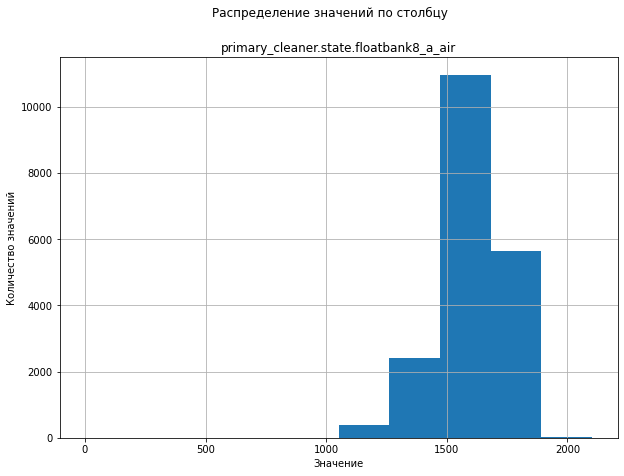

In [26]:
#вывод гистограммы
#df_full['primary_cleaner.state.floatbank8_a_air'].hist()

fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.hist(df_full['primary_cleaner.state.floatbank8_a_air'])
ax.set_title('primary_cleaner.state.floatbank8_a_air')
plt.suptitle('Распределение значений по столбцу')
plt.xlabel('Значение')
plt.ylabel('Количество значений')
ax.grid()

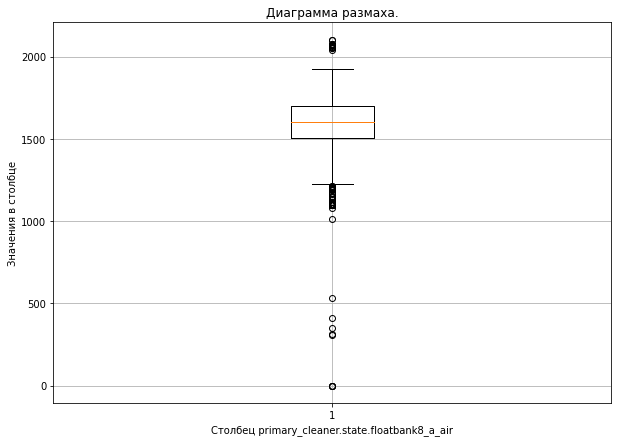

In [27]:
    #вывод диаграммы размаха
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.boxplot(df_full['primary_cleaner.state.floatbank8_a_air'])
ax.set_title('Диаграмма размаха.')
plt.xlabel('Столбец primary_cleaner.state.floatbank8_a_air')
plt.ylabel('Значения в столбце')
ax.grid()

In [28]:
#вывод информации о данных
df_full['primary_cleaner.state.floatbank8_a_air'].describe()

count    1.943900e+04
mean     1.589365e+03
std      1.289886e+02
min      5.445860e-32
25%      1.505127e+03
50%      1.600599e+03
75%      1.697658e+03
max      2.103104e+03
Name: primary_cleaner.state.floatbank8_a_air, dtype: float64

In [29]:
#подсчёт числа значений меньше 1000
len(df_full[df_full['primary_cleaner.state.floatbank8_a_air']<1000])

9

Судя по указанным графикам и данным, видно, что для столбца есть немалое значение как выше 0.75-квантиля, так и ниже 0.25-квантиля. При этом, всё, что ниже значения в 1000 носит скорее единичный характер (всего 9 шт), а также есть значения, которые стремятся к нулю, что несвойственно для этих данных. Есть смысл отбросить значения меньше 1000, а остальные оставить.

In [30]:
#удаление данных со значениями в столбце 'primary_cleaner.state.floatbank8_a_air' <1000
df_train=df_train[df_train['primary_cleaner.state.floatbank8_a_air']>1000]
df_test=df_test[df_test['primary_cleaner.state.floatbank8_a_air']>1000]
df_full=df_full[df_full['primary_cleaner.state.floatbank8_a_air']>1000]

#проверка удаления
#подсчёт числа значений меньше 1000
print(len(df_train[df_train['primary_cleaner.state.floatbank8_a_air']<1000]))
print(len(df_test[df_test['primary_cleaner.state.floatbank8_a_air']<1000]))
print(len(df_full[df_full['primary_cleaner.state.floatbank8_a_air']<1000]))

0
0
0


**Столбцы primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_d_air**

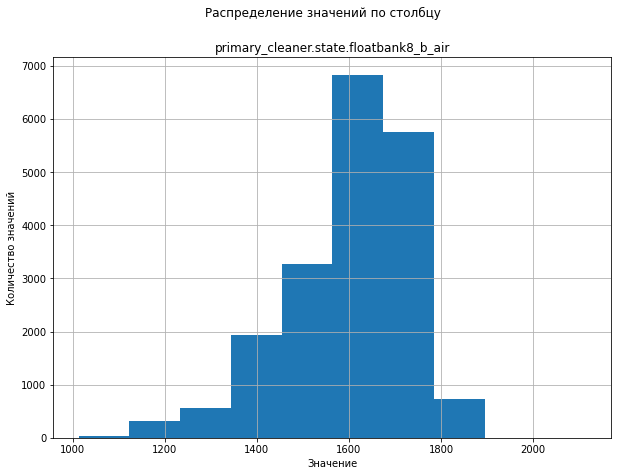

In [31]:
#вывод гистограммы
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.hist(df_full['primary_cleaner.state.floatbank8_b_air'])
ax.set_title('primary_cleaner.state.floatbank8_b_air')
plt.suptitle('Распределение значений по столбцу')
plt.xlabel('Значение')
plt.ylabel('Количество значений')
ax.grid()

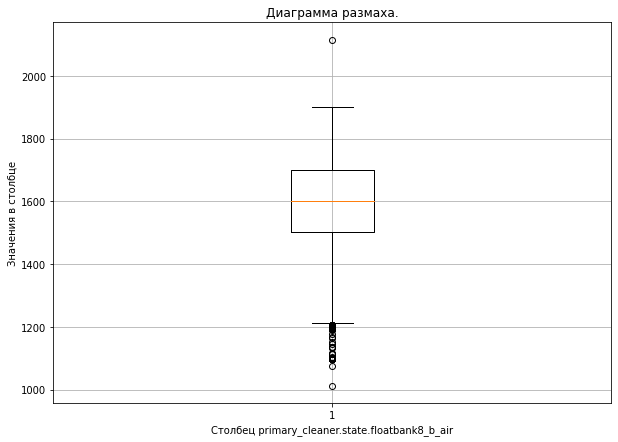

In [32]:
#вывод диаграммы размаха
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.boxplot(df_full['primary_cleaner.state.floatbank8_b_air'])
ax.set_title('Диаграмма размаха.')
plt.xlabel('Столбец primary_cleaner.state.floatbank8_b_air')
plt.ylabel('Значения в столбце')
ax.grid()

In [33]:
#вывод информации о данных
df_full['primary_cleaner.state.floatbank8_b_air'].describe()

count    19430.000000
mean      1591.995142
std        128.389697
min       1012.933963
25%       1503.732449
50%       1600.528142
75%       1699.219547
max       2114.906758
Name: primary_cleaner.state.floatbank8_b_air, dtype: float64

Судя по указанным графикам и данным, видно, что для столбца 'primary_cleaner.state.floatbank8_b_air' выбросы ушли вместе с выбросами по столбцу 'primary_cleaner.state.floatbank8_a_air'. Проверим это для оставшихся столбцов c_air, d_air методом describe():

In [34]:
#вывод информации о данных
df_full['primary_cleaner.state.floatbank8_c_air'].describe()

count    19430.000000
mean      1587.310438
std        132.812382
min          1.421099
25%       1500.946434
50%       1600.255706
75%       1699.483575
max       2013.156457
Name: primary_cleaner.state.floatbank8_c_air, dtype: float64

In [35]:
#вывод информации о данных
df_full['primary_cleaner.state.floatbank8_d_air'].describe()

count    19430.000000
mean      1543.601853
std        244.505224
min        514.649755
25%       1494.716463
50%       1599.452776
75%       1698.528626
max       2398.903635
Name: primary_cleaner.state.floatbank8_d_air, dtype: float64

Итак, в столбцах **a,b,d** выбросов нет, а в столбце **c** хоть и есть минимальное значение (1), что на 3 порядка меньше среднего, но это уже не e-32, так что оставим как есть.

Так как некоторые строки удалены, для корректной работы в дальнейшем с моделями обновим индексы датасетов:

In [36]:
#корректировка индексов
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_full.reset_index(drop=True,inplace=True)

В данном блоке были импортированы исходные данные, изучены распределения значений в них, реконструированы датасеты с учётом требований задачи (для выборки df_train - удалены столбцы, которых нет в выборке test (за исключением целевых признаков rougher.output.recovery, final.output.recovery), для выборки df_test - добавить целевые признаки из полного датасета df_full), а также произведена предобработка данных: обработаны пропуски и выбросы.
</div>  

**Столбцы rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_ag, 'primary_cleaner.output.concentrate_pb'**

При дальнейшем исследовании данных столбцов были получены выбивающиеся аномально небольшие значения, близкие к нулю. Проведём дополнительную предобработку с целью исключения выбросов.

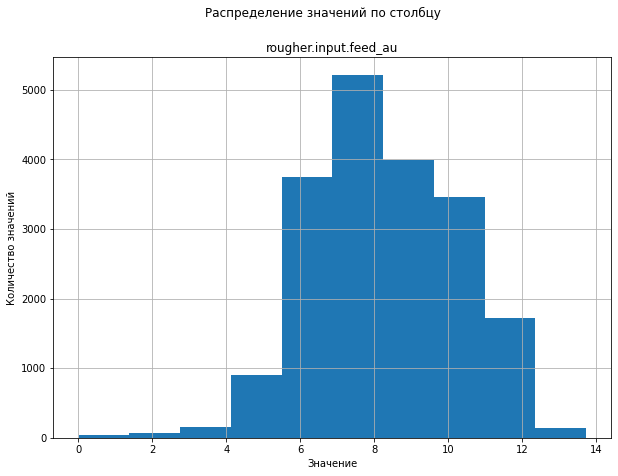

In [37]:
#вывод гистограммы
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.hist(df_full['rougher.input.feed_au'])
ax.set_title('rougher.input.feed_au')
plt.suptitle('Распределение значений по столбцу')
plt.xlabel('Значение')
plt.ylabel('Количество значений')
ax.grid()

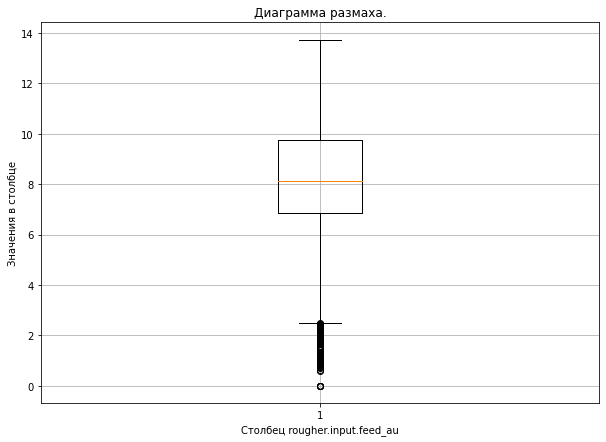

In [38]:
    #вывод диаграммы размаха
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.boxplot(df_full['rougher.input.feed_au'])
ax.set_title('Диаграмма размаха.')
plt.xlabel('Столбец rougher.input.feed_au')
plt.ylabel('Значения в столбце')
ax.grid()

In [39]:
#вывод информации о данных
df_full['rougher.input.feed_au'].describe()

count    19430.000000
mean         8.266328
std          1.953835
min          0.010000
25%          6.854636
50%          8.125788
75%          9.769685
max         13.731330
Name: rougher.input.feed_au, dtype: float64

In [40]:
#подсчёт нижней границы нормальных значений (Q1-1.5IQR)
#0.25 квантиль
Q1=df_full['rougher.input.feed_au'].quantile(0.25)
#0.75 квантиль
Q3=df_full['rougher.input.feed_au'].quantile(0.75)
min_values=Q1-1.5*(Q3-Q1)
min_values

2.48206249981558

In [41]:
#подсчёт числа значений меньше 1.5*(межквантильный размах)
len(df_full[df_full['rougher.input.feed_au']<min_values])

94

Судя по указанным графикам и данным, видно, что для столбца есть немалое значение ниже 0.25-квантиля. При рассмотрении чисел, меньших через 1.5 межквартильного размаха для этих данных (нижний "ус" диаграммы размаха) получили значительное количество явно выбивающихся аномальных значений.

In [42]:
#удаление данных со значениями в столбце<нижнего "уса" диаграммы размаха
df_train=df_train[df_train['rougher.input.feed_au']>min_values]
df_test=df_test[df_test['rougher.input.feed_au']>min_values]
df_full=df_full[df_full['rougher.input.feed_au']>min_values]

#проверка удаления
#подсчёт числа значений меньше 1000
print(len(df_train[df_train['rougher.input.feed_au']<min_values]))
print(len(df_test[df_test['rougher.input.feed_au']<min_values]))
print(len(df_full[df_full['rougher.input.feed_au']<min_values]))

0
0
0


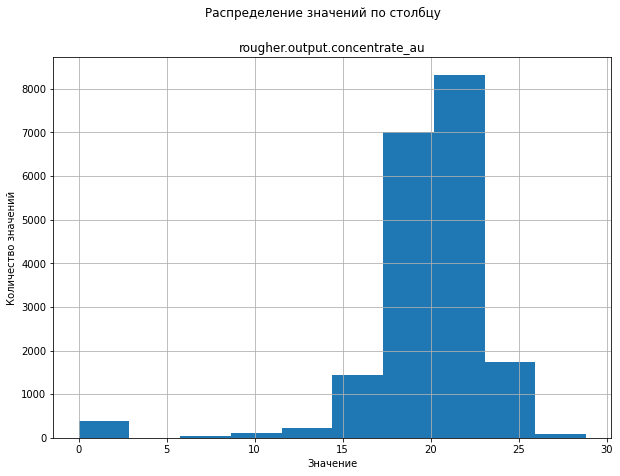

In [43]:
#вывод гистограммы
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.hist(df_full['rougher.output.concentrate_au'])
ax.set_title('rougher.output.concentrate_au')
plt.suptitle('Распределение значений по столбцу')
plt.xlabel('Значение')
plt.ylabel('Количество значений')
ax.grid()

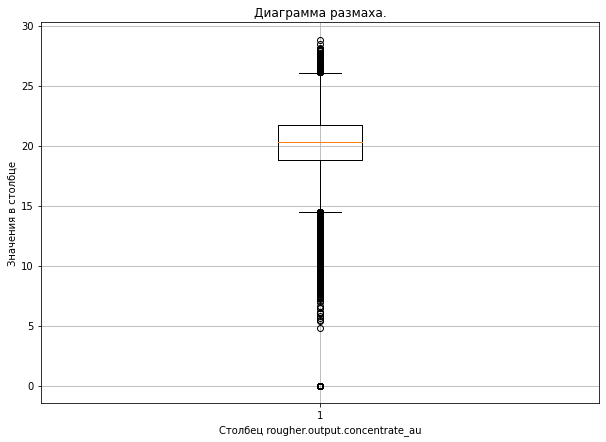

In [44]:
    #вывод диаграммы размаха
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.boxplot(df_full['rougher.output.concentrate_au'])
ax.set_title('Диаграмма размаха.')
plt.xlabel('Столбец rougher.output.concentrate_au')
plt.ylabel('Значения в столбце')
ax.grid()

In [45]:
#вывод информации о данных
df_full['rougher.output.concentrate_au'].describe()

count    19336.000000
mean        19.802031
std          3.717247
min          0.000000
25%         18.828918
50%         20.291756
75%         21.731785
max         28.824507
Name: rougher.output.concentrate_au, dtype: float64

In [46]:
#подсчёт нижней границы нормальных значений (Q1-1.5IQR)
#0.25 квантиль
Q1=df_full['rougher.output.concentrate_au'].quantile(0.25)
#0.75 квантиль
Q3=df_full['rougher.output.concentrate_au'].quantile(0.75)
min_values=Q1-1.5*(Q3-Q1)
min_values

14.47461689271513

In [47]:
#подсчёт числа значений меньше 1.5*(межквантильный размах)
len(df_full[df_full['rougher.output.concentrate_au']<min_values])

774

Судя по указанным графикам и данным, видно, что для столбца есть немалое значение ниже 0.25-квантиля. Аналогично предыдущему, производим удаление аномальных значений.

In [48]:
#удаление данных со значениями в столбце <нижнего "уса" диаграммы размаха
df_full=df_full[df_full['rougher.output.concentrate_au']>min_values]

#проверка удаления
print(len(df_full[df_full['rougher.output.concentrate_au']<min_values]))

0


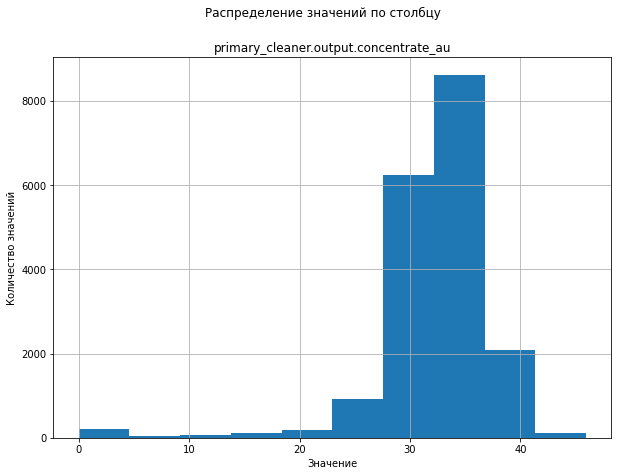

In [49]:
#вывод гистограммы
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.hist(df_full['primary_cleaner.output.concentrate_au'])
ax.set_title('primary_cleaner.output.concentrate_au')
plt.suptitle('Распределение значений по столбцу')
plt.xlabel('Значение')
plt.ylabel('Количество значений')
ax.grid()

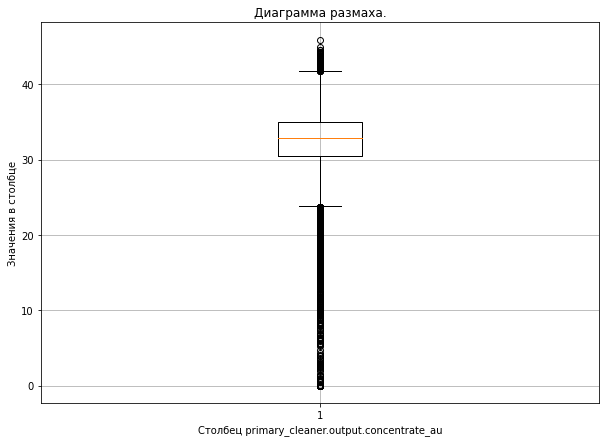

In [50]:
    #вывод диаграммы размаха
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.boxplot(df_full['primary_cleaner.output.concentrate_au'])
ax.set_title('Диаграмма размаха.')
plt.xlabel('Столбец primary_cleaner.output.concentrate_au')
plt.ylabel('Значения в столбце')
ax.grid()

In [51]:
#вывод информации о данных
df_full['primary_cleaner.output.concentrate_au'].describe()

count    18562.000000
mean        32.262602
std          5.268877
min          0.000000
25%         30.531499
50%         32.841374
75%         35.033186
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64

In [52]:
#подсчёт нижней границы нормальных значений (Q1-1.5IQR)
#0.25 квантиль
Q1=df_full['primary_cleaner.output.concentrate_au'].quantile(0.25)
#0.75 квантиль
Q3=df_full['primary_cleaner.output.concentrate_au'].quantile(0.75)
min_values=Q1-1.5*(Q3-Q1)
min_values

23.77897007399247

In [53]:
#подсчёт числа значений меньше 1.5*(межквантильный размах)
len(df_full[df_full['primary_cleaner.output.concentrate_au']<min_values])

662

Судя по указанным графикам и данным, видно, что для столбца есть немалое значение ниже нижнего уса диаграммы размаха. Аналогично предыдущему, производим удаление аномальных значений.

In [54]:
#удаление данных со значениями в столбце 'rougher.input.feed_au' <нижнего "уса" диаграммы размаха
df_full=df_full[df_full['primary_cleaner.output.concentrate_au']>min_values]

#проверка удаления
print(len(df_full[df_full['primary_cleaner.output.concentrate_au']<min_values]))

0


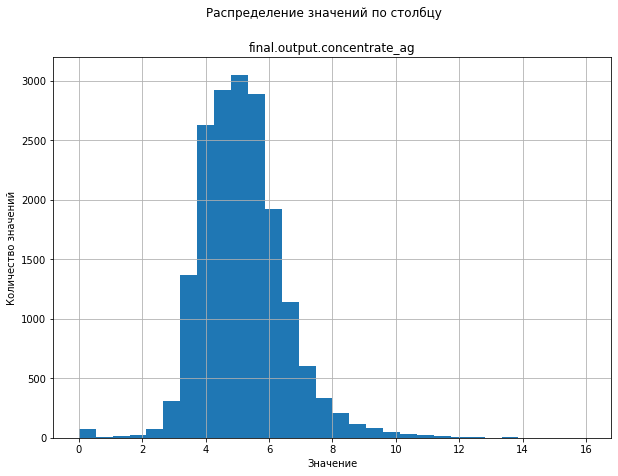

In [55]:
#вывод гистограммы
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.hist(df_full['final.output.concentrate_ag'],bins=30)
ax.set_title('final.output.concentrate_ag')
plt.suptitle('Распределение значений по столбцу')
plt.xlabel('Значение')
plt.ylabel('Количество значений')
ax.grid()

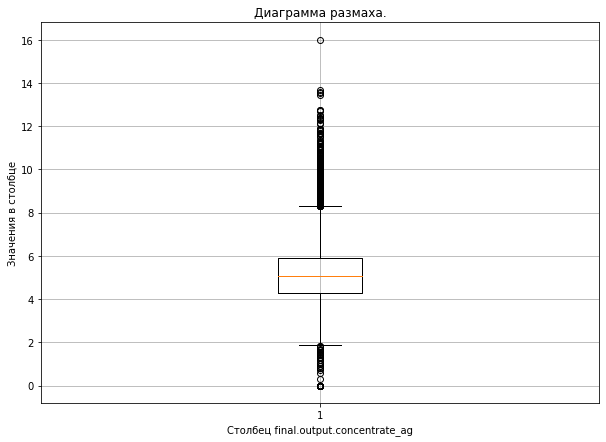

In [56]:
    #вывод диаграммы размаха
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.boxplot(df_full['final.output.concentrate_ag'])
ax.set_title('Диаграмма размаха.')
plt.xlabel('Столбец final.output.concentrate_ag')
plt.ylabel('Значения в столбце')
ax.grid()

In [57]:
#вывод информации о данных
df_full['final.output.concentrate_ag'].describe()

count    17900.000000
mean         5.176414
std          1.337997
min          0.000000
25%          4.263125
50%          5.064461
75%          5.885608
max         16.001945
Name: final.output.concentrate_ag, dtype: float64

In [58]:
#подсчёт нижней границы нормальных значений (Q1-1.5IQR)
#0.25 квантиль
Q1=df_full['final.output.concentrate_ag'].quantile(0.25)
#0.75 квантиль
Q3=df_full['final.output.concentrate_ag'].quantile(0.75)
min_values=Q1-1.5*(Q3-Q1)
max_values=Q3+1.5*(Q3-Q1)

In [59]:
#подсчёт числа значений меньше 1.5*(межквантильный размах)
len(df_full[df_full['final.output.concentrate_ag']<min_values])

100

In [60]:
#подсчёт числа значений меньше 1.5*(межквантильный размах)
len(df_full[df_full['final.output.concentrate_ag']>max_values])

406

Судя по указанным графикам и данным, видно, что для столбца есть немалое количество значений вне диаграммы размаха. Аналогично предыдущему, производим удаление аномальных значений.

In [61]:
#удаление данных со значениями в столбце вне диаграммы размаха
df_full=df_full[df_full['final.output.concentrate_ag']>min_values]
df_full=df_full[df_full['final.output.concentrate_ag']<max_values]

#проверка удаления
print(len(df_full[df_full['final.output.concentrate_ag']<min_values]))
print(len(df_full[df_full['final.output.concentrate_ag']>max_values]))

0
0


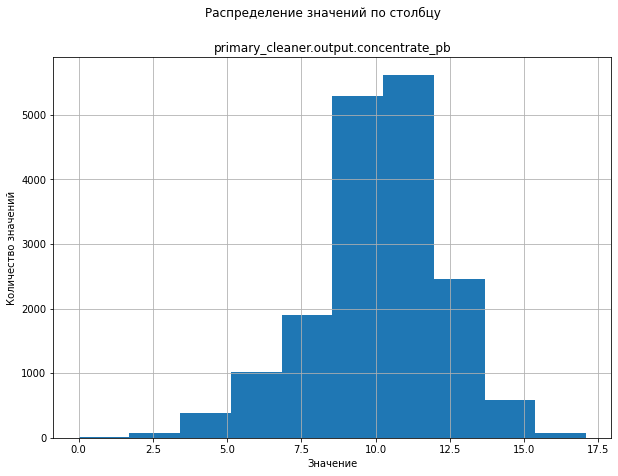

In [62]:
#вывод гистограммы
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.hist(df_full['primary_cleaner.output.concentrate_pb'])
ax.set_title('primary_cleaner.output.concentrate_pb')
plt.suptitle('Распределение значений по столбцу')
plt.xlabel('Значение')
plt.ylabel('Количество значений')
ax.grid()

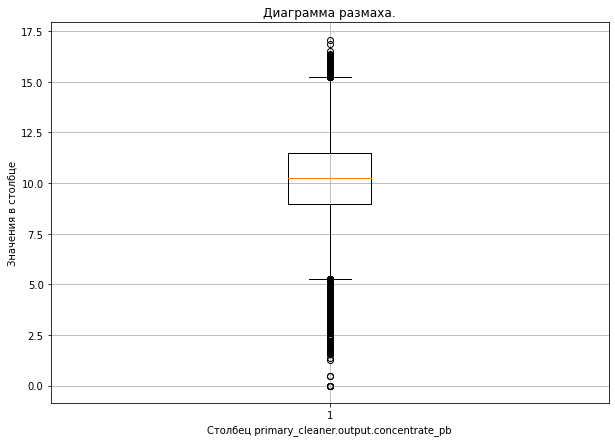

In [63]:
    #вывод диаграммы размаха
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot()
ax.boxplot(df_full['primary_cleaner.output.concentrate_pb'])
ax.set_title('Диаграмма размаха.')
plt.xlabel('Столбец primary_cleaner.output.concentrate_pb')
plt.ylabel('Значения в столбце')
ax.grid()

In [64]:
#вывод информации о данных
df_full['primary_cleaner.output.concentrate_pb'].describe()

count    17394.000000
mean        10.110210
std          2.186080
min          0.000000
25%          8.988767
50%         10.256170
75%         11.481543
max         17.081278
Name: primary_cleaner.output.concentrate_pb, dtype: float64

In [65]:
#подсчёт нижней границы нормальных значений (Q1-1.5IQR)
#0.25 квантиль
Q1=df_full['primary_cleaner.output.concentrate_pb'].quantile(0.25)
#0.75 квантиль
Q3=df_full['primary_cleaner.output.concentrate_pb'].quantile(0.75)
min_values=Q1-1.5*(Q3-Q1)
min_values

5.249601267552414

In [66]:
#подсчёт числа значений меньше 1.5*(межквантильный размах)
len(df_full[df_full['primary_cleaner.output.concentrate_pb']<min_values])

516

Судя по указанным графикам и данным, видно, что для столбца есть немалое значение ниже нижнего уса диаграммы размаха. Аналогично предыдущему, производим удаление аномальных значений.

In [67]:
#удаление данных со значениями в столбце 'rougher.input.feed_au' <нижнего "уса" диаграммы размаха
df_full=df_full[df_full['primary_cleaner.output.concentrate_pb']>min_values]

#проверка удаления
print(len(df_full[df_full['primary_cleaner.output.concentrate_pb']<min_values]))

0


## Анализ данных

### Анализ концентрации металлов на различных этапах

В данном пункте рассмотрим изменение концетрации металлов (Au,Ag,Pb) на различных этапах:
    
    в сырье (rougher.input.feed_*название металла*);
    в черновом концентрате (rougher.output.concentrate_*название металла*);
    в концентрате после первой очистки (primary_cleaner.output.concentrate_*название металла*);
    в финальном концентрате (final.output.concentrate_*название металла*).
    
Рассмотрим особенности данных распределений.

Оперировать будем исходным датафреймом df_full.

Для каждого металла отберём значения концентраций по стадиям, найдём средние значения по столбцу, построим столбчатую диаграмму и посчитаем прирост от этапа к этапу.

In [68]:
#начнем с золота (au)
#выборка столбцов со значениями концентрации металла
df_stages_au=df_full[['rougher.input.feed_au','rougher.output.concentrate_au',
                     'primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
#подсчёт средних значений по столбцу
df_stages_au_mean=df_stages_au.median()
#вывод средних значений
df_stages_au_mean

rougher.input.feed_au                     8.219881
rougher.output.concentrate_au            20.364614
primary_cleaner.output.concentrate_au    32.953472
final.output.concentrate_au              45.096405
dtype: float64

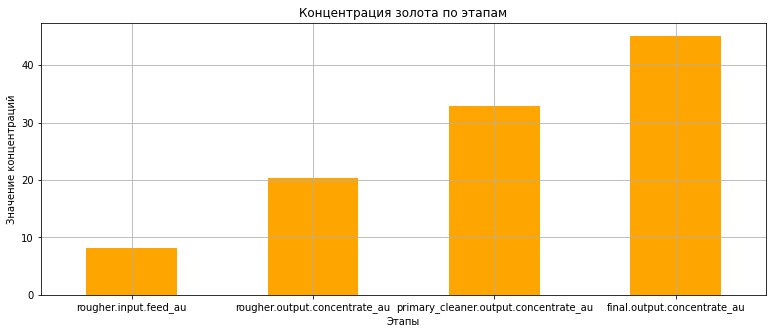

In [69]:
#построение столбчатой диаграммы
df_stages_au.median().plot.bar(figsize=(13,5),rot=0,title='Концентрация золота по этапам',
                               grid=True,color='orange',xlabel='Этапы',ylabel='Значение концентраций');

In [70]:
#расчёт прироста металла
delta_au=[]
for i in [0,1,2]:
    delta_au.append(df_stages_au_mean[i+1]-df_stages_au_mean[i])
print('Прирост металла по стадиям:',delta_au)
print('В среднем прирост:',np.mean(delta_au))

Прирост металла по стадиям: [12.144732852236904, 12.58885799324112, 12.142933226017632]
В среднем прирост: 12.292174690498554


**Вывод:** Для золота следующие результаты: в целом рост линейный, каждый этап даёт примерно одинаковый прирост по значению концентрации металла (в среднем +12,3, видимо, процента) и в конечном счёте чистота материала по золоту составляет 45%.

In [71]:
#серебро(ag)
#выборка столбцов со значениями концентрации металла
df_stages_ag=df_full[['rougher.input.feed_ag','rougher.output.concentrate_ag',
                     'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
#подсчёт средних значений по столбцу
df_stages_ag_mean=df_stages_ag.median()
#вывод средних значений
df_stages_ag_mean

rougher.input.feed_ag                     8.685767
rougher.output.concentrate_ag            12.222319
primary_cleaner.output.concentrate_ag     8.610291
final.output.concentrate_ag               5.045940
dtype: float64

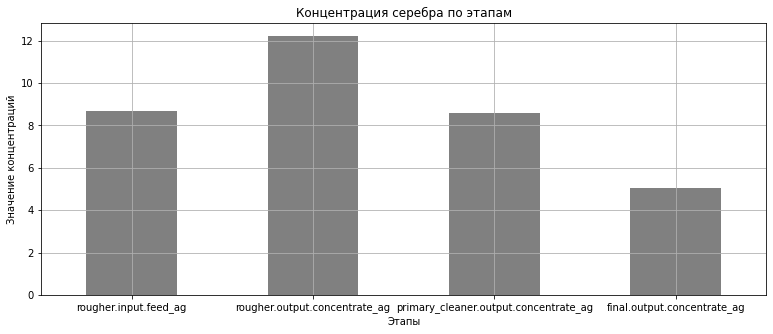

In [72]:
#построение столбчатой диаграммы
df_stages_ag.median().plot.bar(figsize=(13,5),rot=0,title='Концентрация серебра по этапам',grid=True,color='gray',
                              xlabel='Этапы',ylabel='Значение концентраций');

In [73]:
#расчёт прироста металла
delta_ag=[]
for i in [0,1,2]:
    delta_ag.append(df_stages_ag_mean[i+1]-df_stages_ag_mean[i])
print('Прирост металла по стадиям:',delta_ag)
print('В среднем прирост:',np.mean(delta_ag))

Прирост металла по стадиям: [3.5365525367327173, -3.6120287566404237, -3.5643507409672868]
В среднем прирост: -1.2132756536249978


**Вывод:** Для серебра результат поинтереснее: концентрация возрастает после флотации, но далее концетрация данного металла уменьшается, и в конечном счёте становится даже меньше, чем в исходном сырье: 5%. В целом, это объяснимо: задача процесса золотодобычи заключается в добыче золота, и увеличении концетрации именно этого металла, тогда как остальны примеси являются лишь примесями, поэтому их концетрация уменьшается относительно общего объёма материала (который тоже уменьшается: из огромных объёмов исходной руды получаем условно материал с сравнительно высокой концетрацией золота и куда меньшей массы).

In [74]:
#свинец(pb)
#выборка столбцов со значениями концентрации металла
df_stages_pb=df_full[['rougher.input.feed_pb','rougher.output.concentrate_pb',
                     'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]
#подсчёт средних значений по столбцу
df_stages_pb_mean=df_stages_pb.median()
#вывод средних значений
df_stages_pb_mean

rougher.input.feed_pb                     3.578127
rougher.output.concentrate_pb             7.850632
primary_cleaner.output.concentrate_pb    10.323560
final.output.concentrate_pb              10.172748
dtype: float64

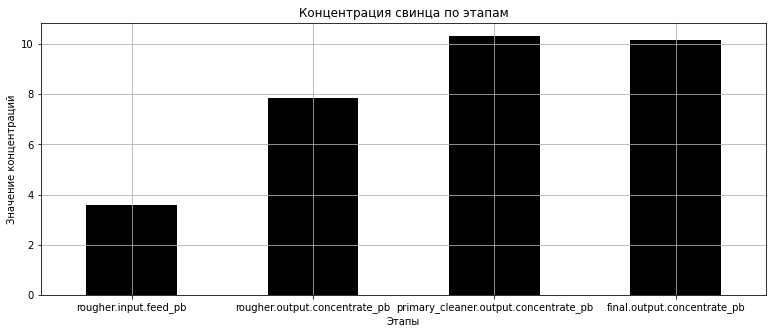

In [75]:
#построение столбчатой диаграммы
df_stages_pb.median().plot.bar(figsize=(13,5),rot=0,title='Концентрация свинца по этапам',grid=True,color='black',
                               xlabel='Этапы',ylabel='Значение концентраций');

In [76]:
#расчёт прироста металла
delta_pb=[]
for i in [0,1,2]:
    delta_pb.append(df_stages_pb_mean[i+1]-df_stages_pb_mean[i])
print('Прирост металла по стадиям:',delta_pb)
print('В среднем прирост:',np.mean(delta_pb))

Прирост металла по стадиям: [4.2725052654371165, 2.4729277485981074, -0.15081204189194608]
В среднем прирост: 2.198206990714426


**Вывод:** Для свинца результаты следующие: на этапах флотации и первой очистки концентрация растёт на 4 и 2 % соответственно, но затем, после этапа второй очистки, концентрация остаётся примерно на том же уровне, что и до очистки, и составляет 10,1%.

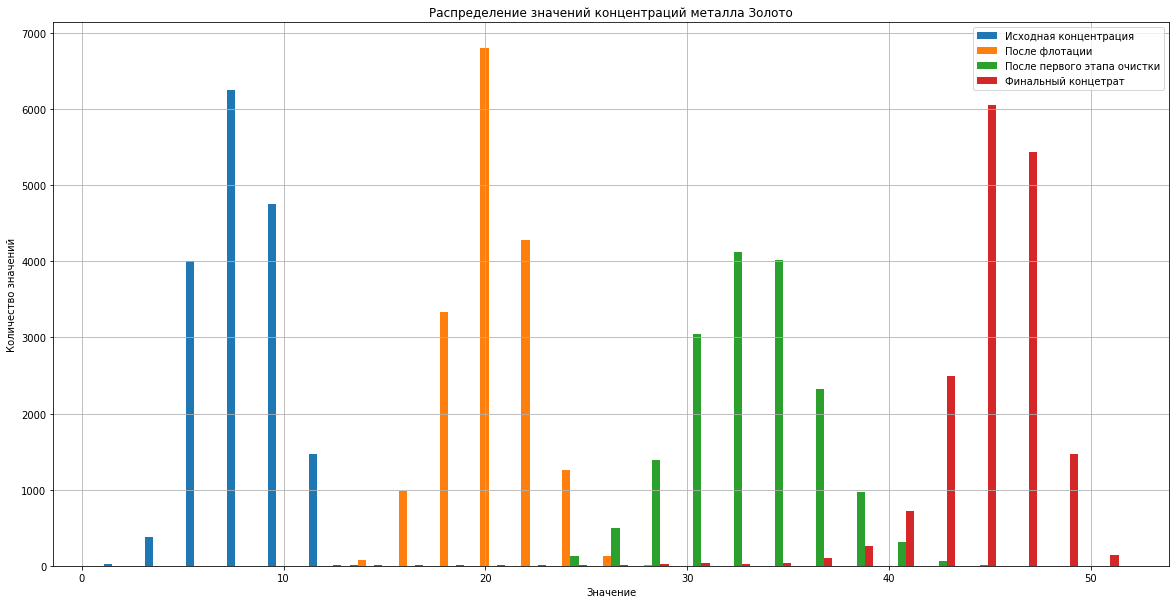

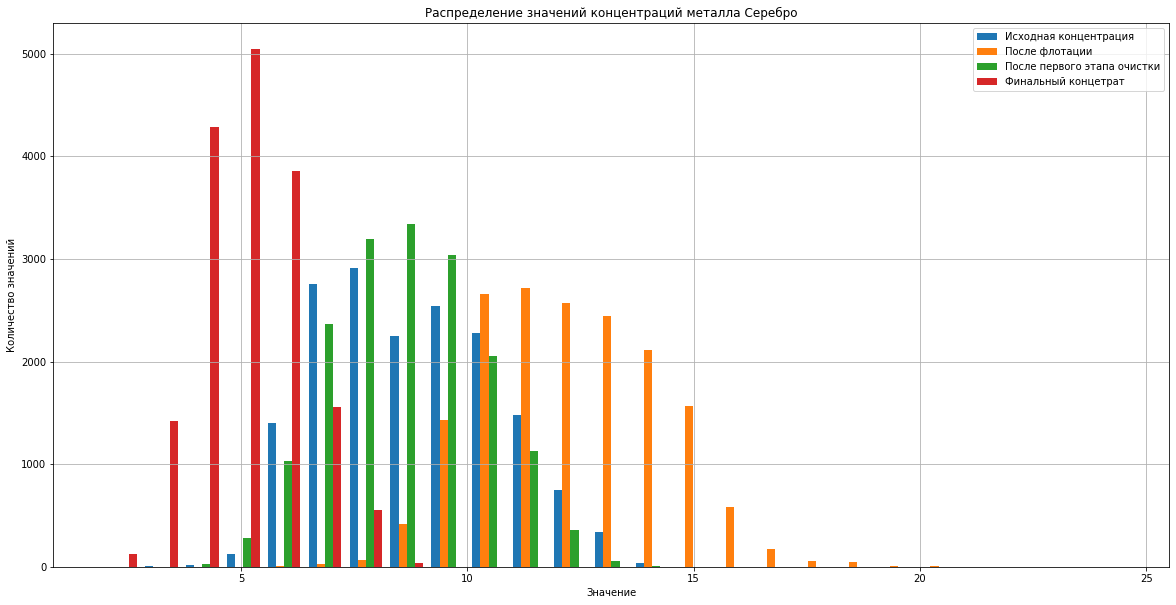

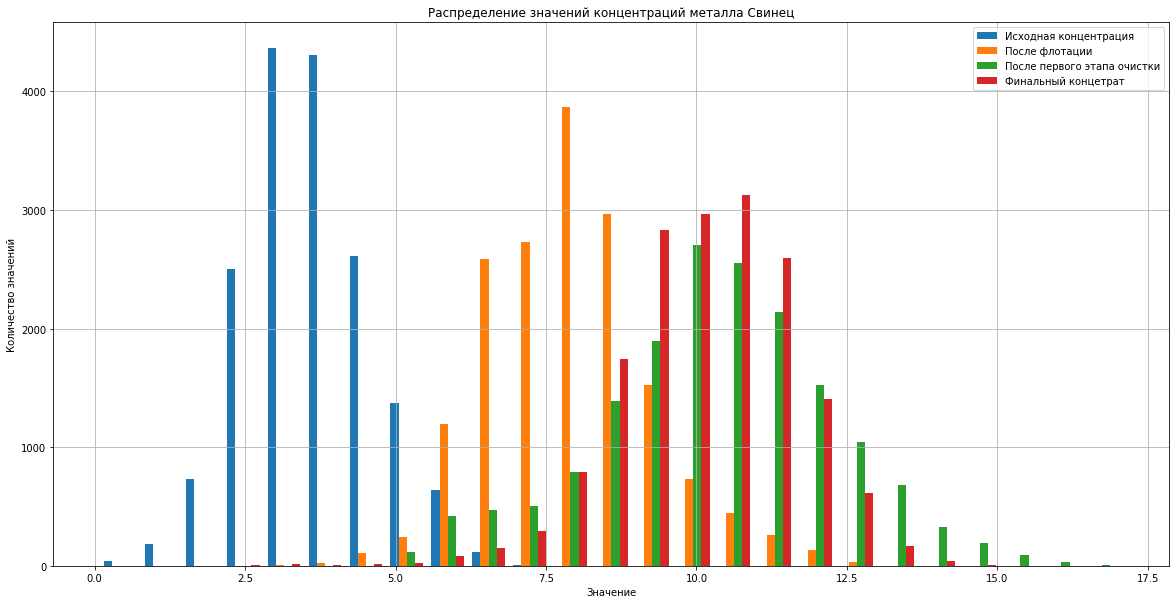

In [77]:
#сохраняем списки с параметрами графиков
titles=['Исходная концентрация','После флотации','После первого этапа очистки','Финальный концетрат']
metalls=['Золото','Серебро','Свинец']
metalls_ind=[df_stages_au,df_stages_ag,df_stages_pb]

#цикл для перебора по металлам
for j in range(len(metalls_ind)):
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot()
    #построение гистограммы с соответствующим цветом
    ax.hist(metalls_ind[j],bins=25)
    ax.set_title(f'Распределение значений концентраций металла {metalls[j]}')
    plt.xlabel('Значение')
    plt.ylabel('Количество значений')
    ax.legend(titles)
    ax.grid()


Краткий вывод: как видно, для всех металлов выполняется следующая закономерность: при получении сырья распределение концентраций носит нормальный характер (логично, случайное распределение металла в руде), а далее, что интересно, происходит уточнение концентраций на выходе после каждого этапа обработки: это говорит о том, что технология очистки работает заранее определенным способом, чтобы получать вещество на выходе именно определённой концетрации металла, увеличивая её по пути обработки. При этом, заметно, что концентрации золота и свинца в целом растут, а серебра - незначительно снижается.



### Сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

В данном пункте сравним распределения размеров гранул исходного сырья rougher.input.feed_size для обучающей df_train и тестовой df_test выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной. Для сравнения приведём гистограммы распределений и посмотрим на данные методом describe()

Визуально распределения похожи, только так как из-за того, что в train значений больше примерно в 3 раза, то и гистограмма сама по себе больше. Проверим методом describe ключевые точки распределений:

In [78]:
#применим метод describe и сохраним результат как DataFrame для наглядного сравнения
train_feed_size=pd.DataFrame({'train':df_train['rougher.input.feed_size'].describe()})
test_feed_size=pd.DataFrame({'test':df_test['rougher.input.feed_size'].describe()})

#объединим результаты в одну таблицу
train_test_feed_size=train_feed_size.join(test_feed_size)

#добавим столбец relation - отношение параметров test к train
train_test_feed_size['relation']=train_test_feed_size['test']/train_test_feed_size['train']

#вывод результатов
train_test_feed_size

,train,test,relation
count,14494.000000,4842.000000,0.334069
mean,59.027090,59.095388,1.001157
std,22.944558,19.532720,0.851301
min,0.049194,0.046369,0.942577
25%,47.286885,47.600717,1.006637
50%,54.405850,55.461058,1.019395
75%,64.291993,66.479783,1.034029
max,484.967466,363.989699,0.750545


Как видно, для ключевых точек: 0.25, 0.5, 0.75 - квантилей и средних значений величины совпадают до 2 знака после запятой. При этом значительно разнятся количество (очевидно), величина стандартного отклонения, а также минимальное и максимальное значения. 

В целом, с учётом ключевых точек, **можно считать распределения схожими.**

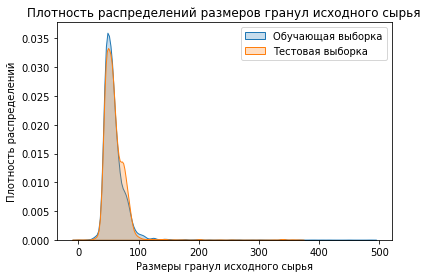

In [79]:
#построение пересекаюихся гистограмм для распределений

plot=sns.kdeplot(data=df_train['rougher.input.feed_size'],fill=True)
plot=sns.kdeplot(data=df_test['rougher.input.feed_size'],fill=True)
plot.set(xlabel='Размеры гранул исходного сырья',ylabel='Плотность распределений',
         title='Плотность распределений размеров гранул исходного сырья')
plt.legend(['Обучающая выборка','Тестовая выборка'],loc='upper right')
plt.show()


На данном графике очевидно, что распределения размеров гранул исходного сырья для обучающей и тестовой выборок почти одинаковы.

</div>  

### Исследование суммарной концентрации металлов на разных стадиях.

Рассмотрим суммарные концентрации металлов (au,ag,pb) на разных стадиях: в сырье, в черновом концентрате, в концентратах после первой и второй очисток. Исследовать будем данные из общего датасета df_full, обращаясь к столбцам концетраций:

    в сырье (rougher.input.feed_*название металла*);
    в черновом концентрате (rougher.output.concentrate_*название металла*);
    в концентрате после первой очистки (primary_cleaner.output.concentrate_*название металла*);
    в финальном концентрате (final.output.concentrate_*название металла*).
    
Сохраним выборки в один датасет и посмотрим на значения и столбчатую диаграмму.

In [80]:
#выборка суммарных концентраций всех металлов по стадиям
#стадия сырья
rougher_input_sum=df_full[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']].sum(axis=1)

#стадия чернового концентрата
rougher_output_sum=df_full[['rougher.output.concentrate_au',
                            'rougher.output.concentrate_ag',
                            'rougher.output.concentrate_pb']].sum(axis=1)

#стадия концентрата после первой очистки
primary_cleaner_concentrate_sum=df_full[['primary_cleaner.output.concentrate_au',
                                          'primary_cleaner.output.concentrate_ag',
                                          'primary_cleaner.output.concentrate_pb']].sum(axis=1)
#стадия концентрата после второй очистки
final_output_sum=df_full[['final.output.concentrate_au',
                          'final.output.concentrate_ag',
                          'final.output.concentrate_pb']].sum(axis=1)

#объединение в один датафрейм для наглядного сравнения
concentrates_sum=pd.DataFrame({'сырьё':rougher_input_sum,
              'черновой концентрат':rougher_output_sum,
              'первая очистка':primary_cleaner_concentrate_sum,
              'финальный выход':final_output_sum})

#вывод датафрейма
concentrates_sum

,сырьё,черновой концентрат,первая очистка,финальный выход
0,14.871440,38.395653,53.111627,58.137072
1,14.905729,38.945647,53.174338,58.699942
2,14.638299,38.649756,52.927464,58.927421
3,14.199305,38.411473,43.979185,58.714815
4,13.511497,38.867359,52.121146,59.065251
...,...,...,...,...
19424,15.988518,36.651656,53.879478,59.307947
19426,15.547126,37.740421,53.164595,59.719404
19427,15.108735,37.824768,54.005770,59.503013
19428,15.078790,38.241211,42.135319,59.173650


In [81]:
concentrates_sum.describe()

,сырьё,черновой концентрат,первая очистка,финальный выход
count,16878.000000,16878.000000,16878.000000,16878.000000
mean,20.833641,40.557201,51.911966,59.937243
std,4.261771,2.954498,2.460997,3.036443
min,6.399459,24.681446,34.753709,6.658562
25%,17.468687,38.715983,50.663625,59.451914
50%,20.356573,40.453912,52.142410,60.381946
75%,23.879986,42.449109,53.503590,61.132104
max,32.840164,55.568687,60.106566,64.968881


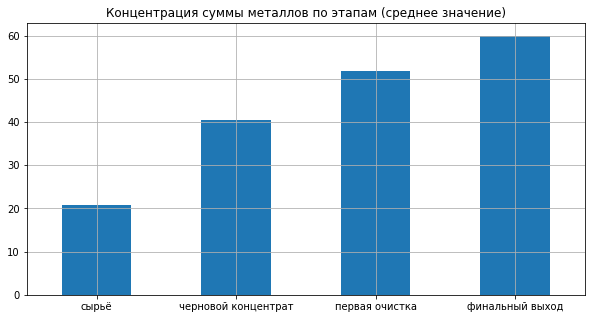

In [82]:
#построение столбчатой диаграммы по средним значениям
concentrates_sum.mean().plot.bar(figsize=(10,5),rot=0,title='Концентрация суммы металлов по этапам (среднее значение)',grid=True);

**Вывод:** суммарная концентрация металлов в продукте растёт после обработки сырья от этапа к этапу примерно линейно: от 20% для флотации и по 10% на первом и втором этапе очистки, получая в финальном выходе чистоту по всем металлам относительно общего материала в 59.2% (по среднему) или 60.3% (по медиане).

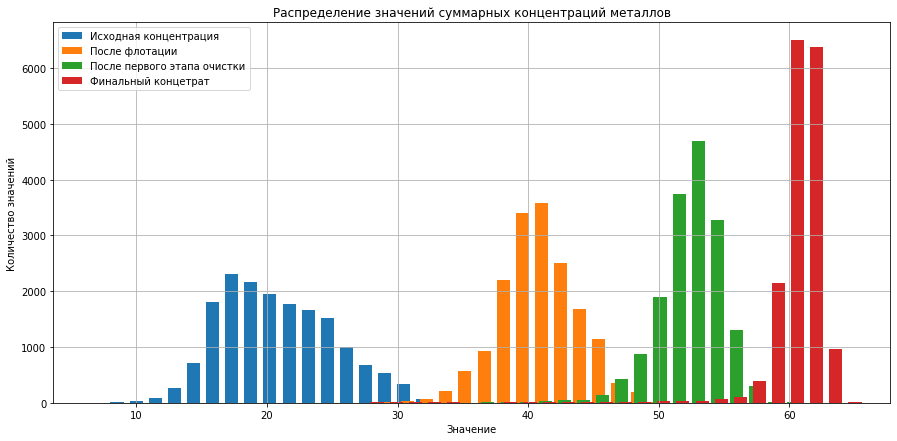

In [83]:
#сохраняем списки с параметрами графиков
titles=['Исходная концентрация','После флотации','После первого этапа очистки','Финальный концетрат']

fig=plt.figure(figsize=(15,7))
ax=fig.add_subplot()
#построение гистограммы
ax.hist(concentrates_sum,bins=40,width=1)
ax.set_title('Распределение значений суммарных концентраций металлов')
plt.xlabel('Значение')
plt.ylabel('Количество значений')
ax.grid()
ax.legend(titles);

## Модель

### Создание функции для вычисления итоговой sMAPE.

In [84]:
def sMAPE(target,predictions):
    return 100*((abs(target-predictions))/
                ((abs(target)+abs(predictions))/2)).sum()/len(target)

In [85]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return 0.25*sMAPE_rougher+0.75*sMAPE_final

### Обучение различных моделей и оценка их качества кросс-валидацией.

Нужно спрогнозировать две величины:
    
    эффективность обогащения чернового концентрата rougher.output.recovery;
    эффективность обогащения финального концентрата final.output.recovery
    
Для этого обучим 3 модели: дерево решений, случайный лес и линейная регрессия, методом кросс-валидации пройдём по всему датасету и для каждой подвыборки посчитаем итоговое sMAPE. Выведем результаты, выберем лучшую модель и проверим её на тестовой выборке.

Как видно, наимеьшую величину ошибки sMAPE показывает модель случайной регрессии. Поэтому возьмём её и проверим на тестовой выборке.

In [86]:
#выбор обучающих и целевых признаков для обучающей выборки
#столбец 'date' сбросим за ненадобностью и потому, что он не числовой
features_train=df_train.drop(['date','rougher.output.recovery','final.output.recovery'],axis=1)
target_rougher_train=df_train['rougher.output.recovery']
target_final_train=df_train['final.output.recovery']

#создание критерия оценки sMAPE для моделей
new_scorer=make_scorer(sMAPE,greater_is_better=False)

In [87]:
#модель дерева решений
model_1=DecisionTreeRegressor(random_state=0)
scores_rougher_1=abs(cross_val_score(model_1,features_train,target_rougher_train,cv=3,scoring=new_scorer))
scores_final_1=abs(cross_val_score(model_1,features_train,target_final_train,cv=3,scoring=new_scorer))

#подсчёт итоговой sMAPE
scores_1=final_sMAPE(scores_rougher_1,scores_final_1)
print('модель дерева решений:',sum(scores_1)/len(scores_1))

модель дерева решений: 24.411786650729372


In [ ]:
%%time
#модель случайного леса
model_2=RandomForestRegressor(random_state=0)
scores_rougher_2=abs(cross_val_score(model_2,features_train,target_rougher_train,cv=3,scoring=new_scorer))
scores_final_2=abs(cross_val_score(model_2,features_train,target_final_train,cv=3,scoring=new_scorer))

#подсчёт итоговой sMAPE
scores_2=final_sMAPE(scores_rougher_2,scores_final_2)
print('модель случайного леса',sum(scores_2)/len(scores_2))

In [90]:
#модель линейной регрессии
model_3=LinearRegression()
scores_rougher_3=abs(cross_val_score(model_3,features_train,target_rougher_train,cv=3,scoring=new_scorer))
scores_final_3=abs(cross_val_score(model_3,features_train,target_final_train,cv=3,scoring=new_scorer))

#подсчёт итоговой sMAPE
scores_3=final_sMAPE(scores_rougher_3,scores_final_3)
print('модель линейной регрессии:',sum(scores_3)/len(scores_3))

модель линейной регрессии: 13.451235567765176



Лучше всех себя показала модель линейной регрессии, попробуем для неё подобрать параметры с кросс-валидацией:
</div>  

In [96]:
%%time
parametres={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False],'positive':[True,False]}

model = LinearRegression()
best_model_1=GridSearchCV(model,parametres,cv=3,scoring=new_scorer)
best_model_1.fit(features_train,target_rougher_train)

print(best_model_1.best_params_)
print(abs(best_model_1.best_score_))

{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': True}
13.54352680817585
CPU times: user 6 s, sys: 8.58 s, total: 14.6 s
Wall time: 21.3 s


In [97]:
%%time
parametres={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False],'positive':[True,False]}

model = LinearRegression()
best_model_2=GridSearchCV(model,parametres,cv=3,scoring=new_scorer)
best_model_2.fit(features_train,target_final_train)

print(best_model_2.best_params_)
print(abs(best_model_2.best_score_))

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': True}
11.037940910104226
CPU times: user 5.34 s, sys: 8.79 s, total: 14.1 s
Wall time: 21.7 s


In [100]:
scores = -final_sMAPE(best_model_1.best_score_,best_model_2.best_score_)

In [101]:
scores

11.664337384622131

In [92]:
#разделение признаков для тестовой выборки
#столбец 'date' сбросим за ненадобностью и потому, что он не числовой
features_test=df_test.drop(['date','rougher.output.recovery','final.output.recovery'],axis=1)
target_rougher_test=df_test['rougher.output.recovery']
target_final_test=df_test['final.output.recovery']

In [94]:
model_rougher = LinearRegression(copy_X=True, normalize=True, fit_intercept=True, positive=True)
model_rougher.fit(features_train,target_rougher_train)

model_final = LinearRegression(copy_X=True, normalize=True, fit_intercept=True, positive=True)
model_final.fit(features_train,target_final_train)

predictions_model_rough = model_rougher.predict(features_test)
predictions_model_final = model_final.predict(features_test)

#подсчёт sMAPE
sMAPE_rougher_model = sMAPE(target_rougher_test, predictions_model_rough)
sMAPE_final_model = sMAPE(target_final_test, predictions_model_final)
score_model = final_sMAPE(sMAPE_rougher_model, sMAPE_final_model)

print(score_model)

7.647759548604348


In [95]:
#создаём константную модель

dummy_clf_rougher = DummyRegressor(strategy="mean")
dummy_clf_rougher.fit(features_train,target_rougher_train)

dummy_clf_final = DummyRegressor(strategy="mean")
dummy_clf_final.fit(features_train,target_final_train)

predictions_dummy_rough=dummy_clf_rougher.predict(features_test)
predictions_dummy_final=dummy_clf_final.predict(features_test)

#подсчёт sMAPE
sMAPE_rougher_dummy=sMAPE(target_rougher_test,predictions_dummy_rough)
sMAPE_final_dummy=sMAPE(target_final_test,predictions_dummy_final)
score_dummy=final_sMAPE(sMAPE_rougher_dummy,sMAPE_final_dummy)

print(score_dummy)

8.758136289469945


Метрика sMAPE для модели случайного леса была 7.53, что меньше результата dummy-модели (8.33), следовательно, моделью случайного леса можно пользоваться.

    
Для принятой модели случайного величина метрики качества итоговой sMAPE на тестовой выборке составила 8.4 %. Данный результат удалось достичь с перебором гиперпараметров методом GridSearchCV для модели Линейной регрессии. При сравнении с предсказаниями Dummy модели,получились результаты точнее примерно на 0,8%.

На втором месте по точности предсказаний - модель случайного леса, на третьем - дерево решений. Для них перебор гиперпараметров не осуществлялся, при этом можно утверждать, что без перебора гиперпараметров эти модели не годятся к применению, так как их итоговая sMAPE хуже, чем sMAPE dummy-модели.



**Вывод**



    
Для принятой модели случайного величина метрики качества итоговой sMAPE на тестовой выборке составила 7,56%, что схоже со значениями, полученными на кросс-валидационных выборках. Данный результат удалось достичь с перебором гиперпараметров методом GridSearchCV. При сравнении с предсказаниями Dummy модели, модель случайного леса точнее примерно на 0,8%.

На втором месте по точности предсказаний - модель линейной регрессии, на третьем - дерево решений. Для них перебор гиперпараметров не осуществлялся, при этом можно утверждать, что без перебора гиперпараметров эти модели не годятся к применению, так как их итоговая sMAPE хуже, чем sMAPE dummy-модели.

